# Hedging & Trading Strategies
## Python Project: Dispersion Trading

<img src='https://mir-s3-cdn-cf.behance.net/project_modules/fs/ac2ba637109175.573659de2775a.jpg' alt='Bloomberg Background' title='Bloomberg Background'>

*By Lucas Martins & Verdolini Adrien*

As part of the **Hedging & Trading Strategies** course, our objective is to develop and implement a trading strategy. We have opted for a quantitative approach, leveraging automated strategies executed through Python. Our strategy must involve trading at least three different securities, including derivative products.

For this project, we will focus on a **dispersion trading** strategy. Dispersion trading capitalizes on the difference between implied and realized volatility, which tends to be more pronounced with index options compared to individual stock options. The strategy involves selling options on an index while simultaneously buying options on individual stocks. **Dispersion trading is essentially a form of correlation trading**, as it tends to be profitable when individual stocks exhibit low correlation and less so during periods of heightened correlation.

However, we anticipate several challenges. Access to the option market requires a broker, and data availability from sources like Yahoo Finance may be insufficient for some underlyings. Moreover, historical data on implied volatility and option prices are not readily accessible, necessitating the simulation of option prices. To address this, we plan to utilize the **Heston Model**, **calibrating the CIR process** using past realized volatility to simulate the variance process. Implied volatility will be derived from the Heston Model's output using a **Newton-Raphson algorithm**.

One limitation of this approach is its computational intensity. We will need to simulate both past and current option prices to derive implied volatility and correlation. Our strategy will capitalize on the spread between implied and realized correlation, requiring the buying and selling of options and delta hedging each position.

We will provide a detailed overview of our entire process throughout the project.

---

### Content

- **[Introduction](#Introduction)**
    - [1. Install Package](#1.-Install-Package)
    - [2. Import Package](#2.-Import-Package)
    - [3. DataFrame Setting](#3.-DataFrame-Setting)
    - [4. Graph Design](#4.-Graph-Design)
    - [5. Future Warning](#5.-Future-Warning)
 
- **[I. Market Analysis](#I.-Market-Analysis)**
    - [1. Exchange-Traded Fund](#1.-Exchange-Traded-Fund)
    - [2. Compare Performance](#2.-Compare-Performance)
    - [3. Volatility](#3.-Volatility)
    - [4. ETF Composition](#4.-ETF-Composition)

- **[II. Option Pricing](#II.-Option-Pricing)**
    - [1. Black Scholes Merton Model](#1.-Black-Scholes-Merton-Model)
    - [2. Heston Model](#2.-Heston-Model)
    - [3. Finding Ornstein-Uhlenbeck Parameters](#3.-Finding-Ornstein-Uhlenbeck-Parameters)
        - [3.1. Mean Ornstein-Uhlenbeck Process](#3.1.-Mean-Ornstein-Uhlenbeck-Process)
        - [3.2. Standard Deviation Ornstein-Uhlenbeck Process](#3.2.-Standard-Deviation-Ornstein-Uhlenbeck-Process)
        - [3.3. Heston Parameters](#3.3.-Heston-Parameters)
    - [4. Option Pricing](#4.-Option-Pricing)
    - [5. Implied Volatility](#5.-Implied-Volatility)
         - [5.1. Newton-Raphson](#5.1.-Newton-Raphson)
    - [6. Option Greeks](#6.-Option-Greeks)
        - [6.1. Delta](#6.1.-Delta)
        - [6.2. Gamma](#6.2.-Gamma)
        - [6.3. Vega](#6.3.-Vega)
        - [6.4. Rho](#6.4.-Rho)
        - [6.5. Theta](#6.5.-Theta)
    - [7. Straddle](#7.Straddle)
        - [7.1. Straddle Delta](#7.1.-Straddle-Delta)
        - [7.2. Straddle Theta](#7.2.-Straddle-Theta)

- **[III. Dispersion Trading](#III.-Dispersion-Trading)**
    - [1. Index Dispersion Measures](#1.-Index-Dispersion-Measures)
        - [1.1. Index Replication](#1.1.-Index-Replication)
        - [1.2. Index Variance](#1.2.-Index-Variance)
        - [1.3. Volatility Boundaries](#1.3.-Volatility-Boundaries)
        - [1.4. Implied Correlation](#1.4.-Implied-Correlation)
    - [2. Weighting for Dispersion Trades](#2.-Weighting-for-Dispersion-Trades)
        - [2.1. Vega Weighted](#2.1.-Vega-Weighted)
        - [2.2. Theta Weighted](#2.2.-Theta-Weighted)
        - [2.3. Gamma Weighted](#2.3.-Gamma-Weighted)
     
- **[IV. Strategy Back-testing](#IV.-Strategy-Back-testing)**
    - [1. Strategy Summary](#1.-Strategy-Summary)
    - [2. Strategy Implementation](#2.-Strategy-Implementation)
    - [3. Strategy Results](#3.-Strategy-Results)
    - [4. Performance & Risk Measures](#4.-Performance-&-Risk-Measures)
        - [4.1. Drawdown](#4.1.-Drawdown)
        - [4.2. Sharpe Ratio](#4.2.-Sharpe-Ratio)
        - [4.3 Other Metrics](#4.3-Other-Metrics)

- **[V. Conclusion](#V.-Conclusion)**
    - [1. Limits](#1.-Limits)
    - [2. Key Points](#2.-Key-Points)
    - [3. References](#3.-References)


---

## Introduction

### 1. Install Package
- **Numpy:** manage arrays.
- **Pandas:** deals with DataFrame.
- **Scipy:** statistical tools.
- **Matplotlib:** library to display graphs.
- **Seaborn:** improve the graphs.
- **Yfinance:** import financial data from Yahoo Finance.

In [1]:
# !pip install numpy

In [2]:
# !pip install pandas

In [3]:
#!pip install scipy

In [4]:
#!pip install matplotlib

In [5]:
# !pip install seaborn

In [6]:
# !pip install yfinance

### 2. Import Package

In [7]:
"""
Import Libraries
"""

# Manage date and time
import datetime as dt

# Deals with array
import numpy as np

# Deals with DataFrame
import pandas as pd

# Use statistic and math tools
import scipy as sci

# Display graphs
import matplotlib.pyplot as plt

# Use advance graph
import seaborn as sns

# Import data from Yahoo Finance
import yfinance as yf

### 3. DataFrame Setting

In [8]:
"""
Manage the DataFrame display
"""

# Set the maximum DataFrame rows displayed as 10
pd.options.display.max_rows = 10

### 4. Graph Design

In [9]:
"""
Manage the graph design
"""

# Use a style to improve graphs
plt.style.use('seaborn-v0_8')

# Set the default color palette
sns.set_palette('deep', 10)

# Set a larger size for the graphs
plt.rcParams['figure.figsize'] = (12, 6)

### 5. Future Warning
The **Pandas** library may generate a **FutureWarning** message regarding upcoming updates. While this isn't an error originating from the code but rather a precautionary measure for future updates, we'll disable the **FutureWarning** to prevent its display.

In [10]:
# Import the warning package
import warnings

# Mute all the warnings relative to FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

---

## I. Market Analysis
In this section, we will analyze the market, specifically comparing U.S. sectoral ETFs to determine which one is more suitable for our investment strategy. Our goal is to find an ETF with highly dispersed components, as the purpose of dispersion trading, as we will undertake, is to capture the difference between implied and realized correlation.

The U.S. sector is one of the most liquid. In the context of our strategy, we will not rely on fundamental analysis but rather on statistical and quantitative analysis.

---

> As per the instructions provided in class, it is required to execute the strategy one month prior to the observation date. For instance, if we are evaluating the strategy on April 30, 2024, we need to run the strategy from March 30, 2024, to April 30, 2024. Additionally, we will need to calibrate our models using historical data. Therefore, we will download one year of data prior to the start date and employ the in-sample and out-of-sample method for calibration.

**"In-sample"** and **"out-of-sample"** are terms commonly used in statistics, machine learning, and financial modeling to describe different sets of data used for training and testing purposes.

- **In-Sample Data:** In-sample data refers to the data that is used to develop or train a statistical model or trading strategy. When building a model, analysts typically use historical data to estimate parameters, test hypotheses, or optimize the model's performance. In-sample data is used to fit the model to the historical patterns or relationships present in the data.
(e.g. from March 30, 2023, to March 30, 2024)

- **Out-of-Sample Data:** Out-of-sample data, on the other hand, refers to data that is not used during the model development process. It is reserved for testing the model's performance and assessing its ability to generalize to new, unseen data. Out-of-sample data helps evaluate how well the model performs on data that it hasn't been trained on, providing insights into its predictive accuracy and robustness.
(e.g. from March 30, 2024, to April 30, 2024)

In [11]:
# Specify the number of years for the historical data
history_year = 1

# Specify the number of month on which we will run the strategy
strategy_period_month = 1

# Get the today date
end_date = dt.date.today()

# Retrieve the initial date of the desired historical data
start_date = dt.date(year=end_date.year - history_year, month=end_date.month, day=end_date.day)

# Retrieve the initial date of the strategy
strategy_start_date = dt.date(year=end_date.year, month=end_date.month - strategy_period_month, day=end_date.day)

In [12]:
def get_nb_business_days(date: dt.date) -> int:
    """
    Get the number of business day in the year

    Args:
        date (dt.date):
            Date with the desired year to calculate the number of business days.

    Returns:
        nb_business_day (int):
            Number of business days.
    """

    # Get the number of business day this year
    nb_business_day = np.busday_count(dt.date(int(date.year), 1, 1), dt.date(int(date.year), 12, 31))

    return nb_business_day

In [13]:
# Get the number of business day during the year of the given date
nb_business_day = get_nb_business_days(end_date)

# Display the number of business day
print(f'In {end_date.year} there are {nb_business_day} business days')

In 2024 there are 261 business days


### 1. Exchange-Traded Fund
An ETF is a type of investment fund that is traded on stock exchanges, similar to individual stocks. ETFs are designed to track the performance of a specific index, commodity, bond, or a combination of assets. They offer investors a way to gain exposure to a diversified portfolio of assets without having to buy each security individually.

The most commonly used sectoral ETFs include:
- **XLB**: Materials
- **XLC**: Communication Services
- **XLE**: Energy
- **XLF**: Financials
- **XLI**: Industrial
- **XLK**: Technology
- **XLP**: Consumer Staples
- **XLU**: Utilities
- **XLV**: Health Care
- **XLY**: Consumer Discretionary

In [14]:
def get_prices(
    ticker: str,
    interval: str='1d',
    start: str=None,
    end: str=None,
    **kwargs,
) -> pd.core.frame.DataFrame:
    """
    Fetches, from Yahoo Finance, price history for a given tickers.

    Args:
        ticker (str): 
            The ticker symbol.
        
        interval (str):
            The time interval for the price history.
            Valid intervals: [1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo]
            
        start (str):
            The start date of the price history.
            
        end (str): The end date of the price history.
        
        **kwargs:
            Additional arguments to pass to the history method of yfinance.

    Returns:
        closing_price_df (pandas.core.frame.DataFrame):
            A DataFrame containing the prices history.
    """

    # Download price for a single asset
    if type(ticker) == str:

        # Get asset information
        ticker_info = yf.Ticker(ticker)

        # Download past prices
        ticker_history_df = ticker_info.history(interval=interval, start=start, end=end, **kwargs)

        # Only keep the closing price history
        closing_price_df = ticker_history_df[['Close']]

    # Download price for multiple assets
    elif type(ticker) == list:

        # Get assets information
        tickers_info = yf.Tickers(ticker)

        # Download past prices
        tickers_history_df = tickers_info.history(interval=interval, start=start, end=end, **kwargs)

        # Only keep the closing price history
        closing_price_df = tickers_history_df['Close']

    return closing_price_df

In [15]:
"""
Import the ETF Tickers & Download Prices History
"""

# Set the list of U.S. sectorial ETFs
etf_tickers = ['XLB', 'XLC', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY']

# Download ETFs historical prices
etf_prices_df = get_prices(etf_tickers, start=start_date, end=end_date)

# Display the ETFs historical prices
etf_prices_df

[*********************100%%**********************]  10 of 10 completed


Ticker,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,,
2023-03-06,81.500000,54.253208,84.207764,35.348213,101.673965,139.599335,70.851234,64.421806,126.989349,143.993317
2023-03-07,79.894073,53.698395,82.741608,34.435555,100.367180,137.864380,70.149834,63.366989,124.943520,142.030319
2023-03-08,80.285767,53.728119,81.892776,34.307980,100.602989,139.004501,70.266731,63.850857,124.274681,141.772568
2023-03-09,78.219627,52.519405,80.735275,32.914463,99.119339,137.011749,69.614052,63.337952,123.015709,138.391815
2023-03-10,76.554970,51.776348,79.703178,32.315842,97.272163,134.602692,69.273079,62.341187,122.110825,137.013748
...,...,...,...,...,...,...,...,...,...,...
2024-02-28,86.900002,78.660004,85.720001,40.360001,120.629997,204.699997,74.570000,62.080002,146.009995,183.169998
2024-02-29,87.559998,79.360001,86.139999,40.340000,121.000000,206.979996,74.449997,62.099998,144.820007,184.410004
2024-03-01,87.959999,80.019997,87.139999,40.290001,121.519997,210.759995,74.459999,61.720001,146.339996,185.020004


In [16]:
def get_in_out_sample(
    dataframe: pd.core.frame.DataFrame,
    start_out: str,
) -> pd.core.frame.DataFrame:
    """
    Split the DataFrame according to a given date
    Obtain the in-sample and out-sample

    Args:
        dataframe (pd.core.frame.DataFrame):
            Initial DataFrame to split.

        start_out (str):
            Start date of the out-sample DataFrame.

    Returns:
        in_sample_df (pd.core.frame.DataFrame):
            In-sample part of the DataFrame.

        out_sample_df (pd.core.frame.DataFrame):
            Out-sample part of the DataFrame.
    """

    # Get the date just before the start date, to end the in-sample DataFrame
    end_in = start_out - dt.timedelta(days=1)

    # Convert the end_in date to str from dt.date
    end_in_str = str(end_in)

    # Get the in-sample DataFrame
    in_sample_df = dataframe.loc[:end_in_str]

    # Get the out-sample DataFrame
    out_sample_df = dataframe.loc[start_out:]

    return in_sample_df, out_sample_df

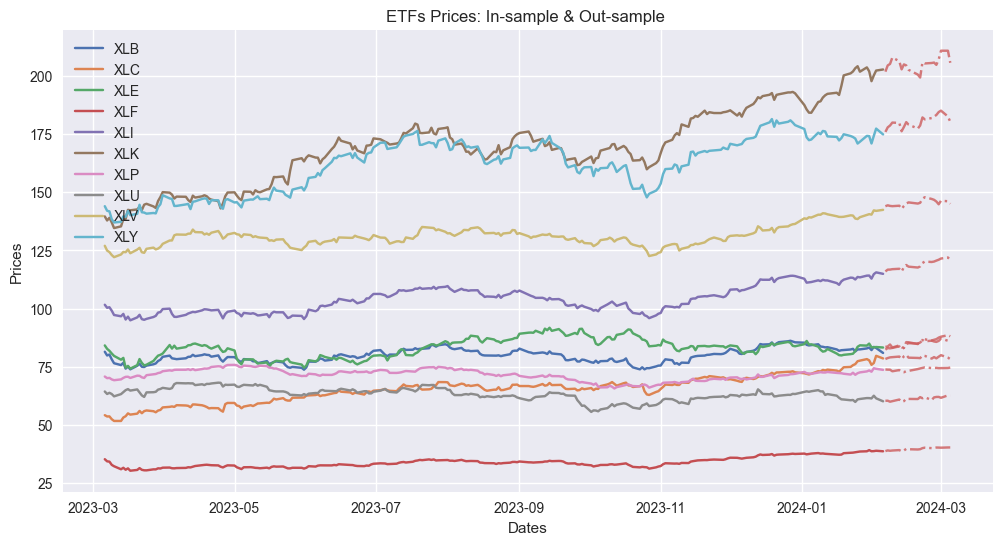

In [17]:
# Separate the in-sample and the out-sample
etf_in_sample_df, etf_out_sample_df = get_in_out_sample(etf_prices_df, strategy_start_date)

"""
Display prices: in-sample & out-sample 
"""

# Display the in-sample prices
plt.plot(etf_in_sample_df)

# Display the out-sample prices
plt.plot(etf_out_sample_df, ls='-.', c='indianred', alpha=0.8)

# Set the graph title
plt.title('ETFs Prices: In-sample & Out-sample ')

# Set the X and Y axis labels
plt.xlabel('Dates')
plt.ylabel('Prices')

plt.legend(etf_in_sample_df.columns);

### 2. Compare Performance
In order to compare performance, we need to adjust the price and normalize it.

In [18]:
def normalize_pct(
    dataframe: pd.core.frame.DataFrame,
    base: float=100.0,
) -> pd.core.frame.DataFrame:
    """
    Normalize values with a base value at a given date
    Make values comparable in term of percentage

    Args:
        dataframe (pd.core.frame.DataFrame):
            Initial DataFrame to adjust values.

        base (float):
            Base value to initialize the values.

    Returns:
        dataframe_normalized (pd.core.frame.DataFrame)
            DataFrame with the values initialized.
    """

    # Get the percentage change of the values
    dataframe_pct = dataframe.pct_change() + 1

    # Initialize the first value with the base value
    dataframe_pct.iloc[0] = base

    # Cumulate the perentage change for the whole serie
    dataframe_normalized = dataframe_pct.cumprod()

    return dataframe_normalized

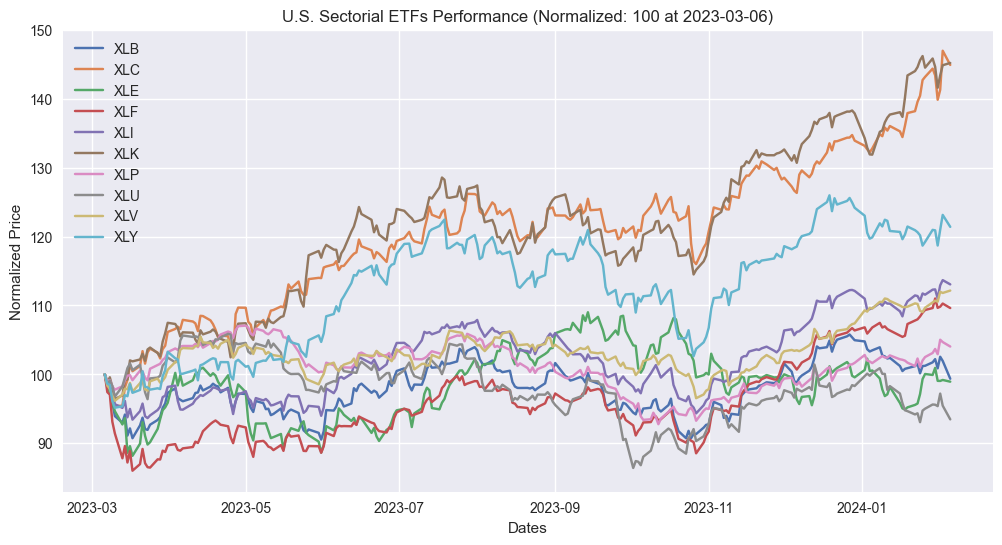

In [19]:
# Normalized the in-sample price to be comparable
norm_price_df = normalize_pct(etf_in_sample_df)

# Get the date of the normalization, first date in the DataFrame index
datetime_str = str(norm_price_df.index[0])

# Only keep the date and not the time
date = datetime_str.split(' ')[0]

"""
Display past performances
"""

# Display the normalized prices history
plt.plot(norm_price_df)

# Set the graph title
plt.title(f'U.S. Sectorial ETFs Performance (Normalized: 100 at {date})')

# Set the X and Y axis label
plt.xlabel('Dates')
plt.ylabel('Normalized Price')

plt.legend(norm_price_df.columns);

### 3. Volatility
The volatility refers to the degree of variation of a trading price series over time. It is a statistical measure of the dispersion of returns for a given security or market index. Volatility is often interpreted as a measure of risk or uncertainty in the financial markets.

In [20]:
def get_realised_vol(
    dataframe: pd.core.frame.DataFrame,
    window: int=30,
    nb_day_year: int=252,
) -> pd.core.frame.DataFrame:
    """
    Calculte the rolling volatility of a DataFrame

    Args:
        dataframe (pd.core.frame.DataFrame):
            Initial DataFrame to calculate voatility.

        window (int):
            Number of day to calculate the rolling volatility.

        nb_day_year (int):
            Number of day in one year.

    Returns:
        dataframe_vol (pd.core.frame.DataFrame):
            DataFrame with the annual volatility.
    """

    # Get the change in percentage of the intial values
    dataframe_pct = dataframe.pct_change()

    # Calculate the rolling annual volatility, with a given window of day
    dataframe_vol = dataframe_pct.rolling(window).std() * np.sqrt(nb_day_year)

    # Delete the NaN values
    dataframe_vol.dropna(inplace=True)

    return dataframe_vol

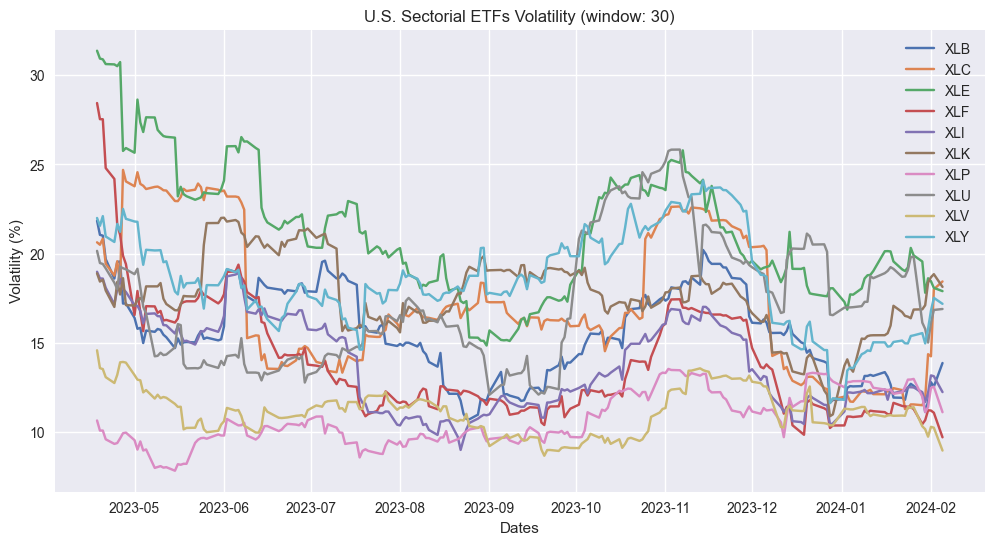

In [21]:
# Set the rolling window as 30 days, we try to fit with one month volatility
day_range = 30

# Calculate the ETFs volatility of the in-sample prices
vol_history_df = get_realised_vol(etf_in_sample_df, day_range, nb_business_day)

"""
Display past volatility
"""

# Display the volatility history
plt.plot(vol_history_df * 100)

# Set the graph title
plt.title(f'U.S. Sectorial ETFs Volatility (window: {day_range})')

# Set the X and Y axis label
plt.xlabel('Dates')
plt.ylabel('Volatility (%)')

# Set the legend of the graph
plt.legend(vol_history_df.columns);

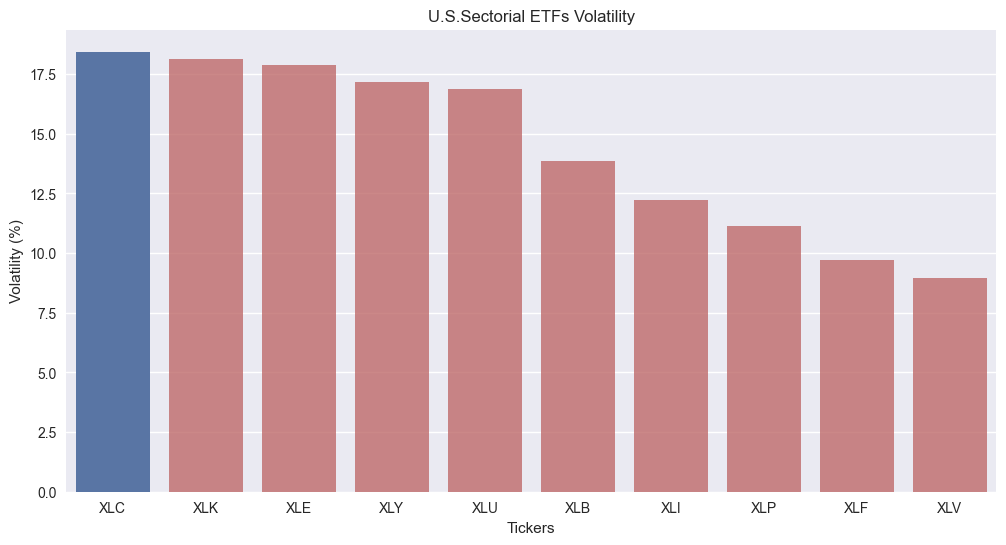

In [22]:
"""
Display Current Volatility (Bar Chart)
"""

# Get the current volatility and sort it by descending order
vol_sorted_df = vol_history_df.iloc[-1].sort_values(ascending=False)

# Display a bar graph
sns.barplot(vol_sorted_df[vol_sorted_df.index == vol_sorted_df.index[0]] * 100)
sns.barplot(vol_sorted_df.iloc[1:] * 100, color='indianred', alpha=0.8)

# Set the graph title
plt.title('U.S.Sectorial ETFs Volatility')

# Set the X and Y axis label
plt.ylabel('Volatility (%)')
plt.xlabel('Tickers');

For our trading strategy, we will use the most volatile ETF.

In [23]:
# Get the most volatile ETFs
etf_ticker = vol_sorted_df.index[0]

# Print the result for the more volatile ETF
print('The most volatile ETF is: ', etf_ticker)

The most volatile ETF is:  XLC


### 4. ETF Composition
The composition of an Exchange-Traded Fund (ETF) refers to the underlying assets that the ETF holds within its portfolio. ETFs are designed to track the performance of a specific index, commodity, bond, or a combination of assets. The composition of an ETF depends on its investment objective and the index or benchmark it seeks to replicate.
  
In our case, we are seeking the stocks present in the ETF. We will extract data from CSV files.

In [24]:
def get_etf_composition(ticker: str) -> pd.core.frame.DataFrame:
    """
    Obtain ETF composition from CSV file

    Args:
        ticker (str): 
            The ticker symbol.

    Returns:
        composition_df (pd.core.frame.DataFrame):
            DataFrame with the ETF composition: tickers and weighting.
    """

    # Set the path to find the CSV file
    path = 'U.S. Sectorial ETF/'+ ticker +'.CSV'

    # Extract the CSV file data
    composition_df = pd.read_csv(path, index_col='Symbol', header=1)

    # Only keep the Index weight, the rest of information doesn't matter
    composition_df = composition_df[['Index Weight']]

    # Get the weights as list format
    weight_list = composition_df['Index Weight'].to_list()

    # Change the format of weight from str to float
    for index, weight in enumerate(weight_list):

        # Delete the '%' in the string and convert str in float
        weight = float(weight[:-1])

        # Set the percentage format to decimal
        composition_df.iloc[index] = weight / 100

    return composition_df

In [25]:
def get_date_composition(ticker: str) -> str:
    """
    Obtain the date of the CSV file creation
    The ETF components weight is fixed at this date
    
    Args:
        ticker (str): 
            The ticker symbol.

    Returns:
        date (str):
            Corresponding date of the ETF composition.
    """

    # Set the path to find the CSV file
    path = 'U.S. Sectorial ETF/'+ ticker +'.CSV'

    # Get the data frome the CSV file
    csv_file = pd.read_csv(path)

    # Get the header of the file
    csv_header = csv_file.columns

    # Get the first column, with name and date
    csv_info = csv_header[0]

    # Get the date of the file
    date = csv_info.split(' ')[-1]

    return date

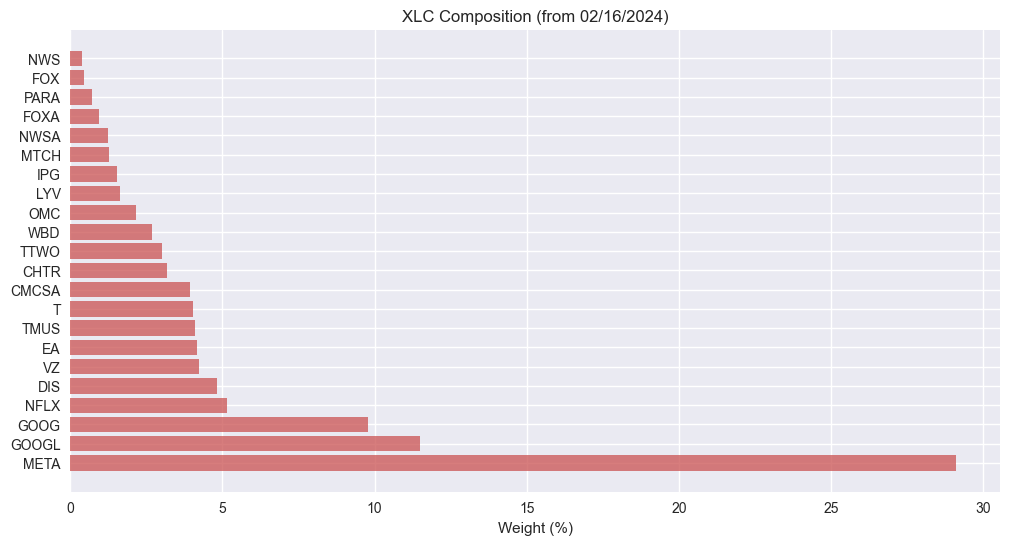

In [26]:
# Get the composition of our ETF
component_df = get_etf_composition(etf_ticker)

# Save the components ticker into a list 
components_ticker = component_df.index.to_list()

# Add the ETF ticker into a list
etf_compo_ticker = components_ticker + [etf_ticker]

# Save the components weight into a numpy array
components_weight = component_df['Index Weight'].to_numpy(dtype=float)

"""
Display the ETF weight
""" 
# Get the date of the composition from the CSV file
date = get_date_composition(etf_ticker)

# Display horizontal bar chart
plt.barh(components_ticker, components_weight*100, color='indianred', alpha=0.8)

plt.title(f'{etf_ticker} Composition (from {date})')

# St the X axis label
plt.xlabel('Weight (%)');

In [27]:
# Download price history of the ETF and its components
components_prices_df = get_prices(etf_compo_ticker, start=start_date, end=end_date)

# Split the ETF components DataFrame to get in-sample and out-sample
price_in_df, price_out_df = get_in_out_sample(components_prices_df, strategy_start_date)

[*********************100%%**********************]  23 of 23 completed


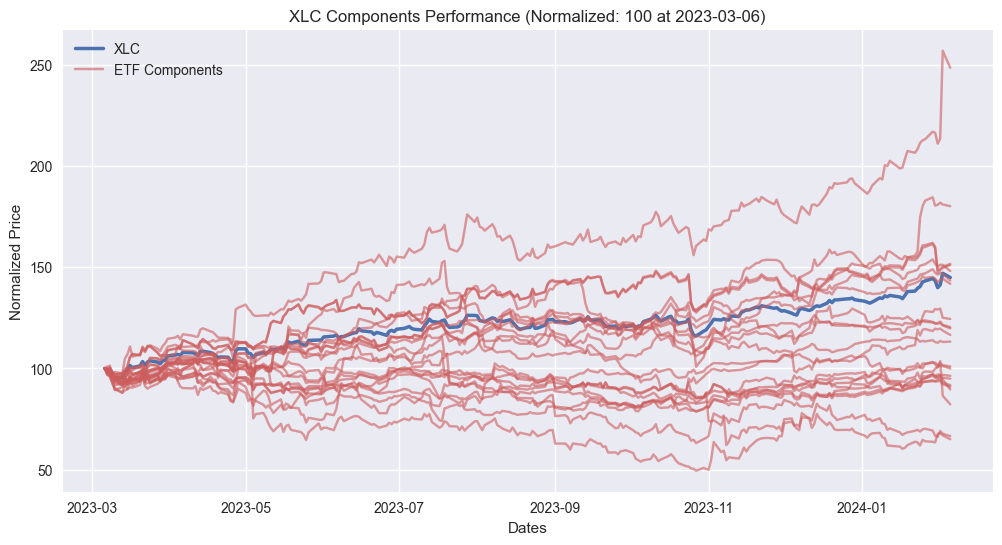

In [28]:
# Normalized the price to be comparable
norm_price_df = normalize_pct(components_prices_df)

# Separate the normalized serie to have in-sample and out-sample price
norm_in_sample_df, norm_out_sample_df = get_in_out_sample(norm_price_df, strategy_start_date)

# Get the date of the normalization, first date in the DataFrame index
datetime_str = str(norm_in_sample_df.index[0])

# Only keep the date and not the time
date = datetime_str.split(' ')[0]

"""
Display the performance of the ETF and its components 
"""

# Display the normalized prices history of the ETF
plt.plot(norm_in_sample_df[etf_ticker], label='etf_ticker', linewidth=2.5)

# Display the normalized prices history of ETF components
plt.plot(norm_in_sample_df[components_ticker], c='indianred', alpha=0.6)

# Set the graph title
plt.title(f'{etf_ticker} Components Performance (Normalized: 100 at {date})')

# Set the X and Y axis label
plt.xlabel('Dates')
plt.ylabel('Normalized Price')

plt.legend([etf_ticker, 'ETF Components']);

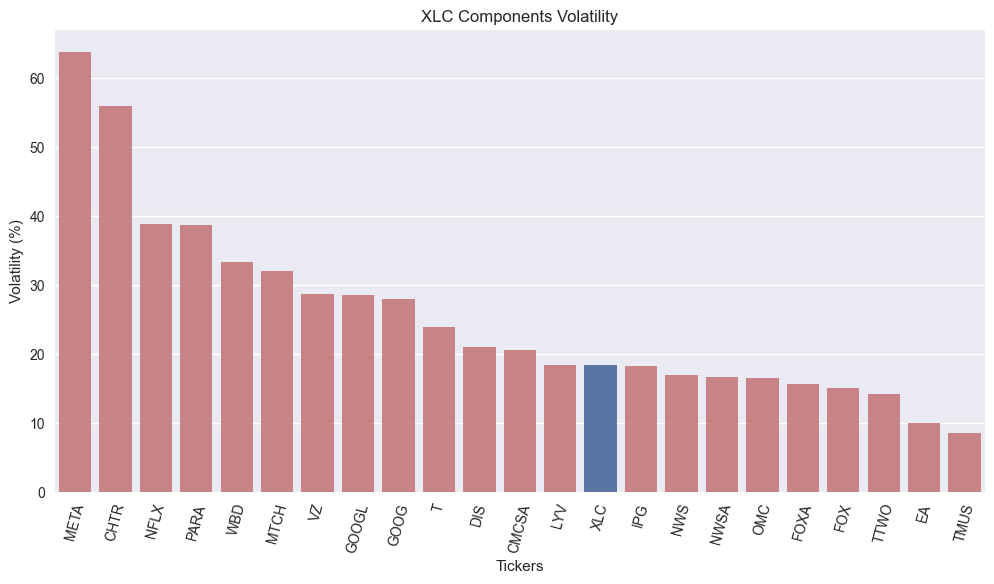

In [29]:
# Calculate the ETF components volatility
components_vol_df = get_realised_vol(components_prices_df, day_range, nb_business_day)

# Separate the normalized serie to have in-sample and out-sample price
vol_in_sample_df, vol_out_sample_df = get_in_out_sample(components_vol_df, strategy_start_date)

"""
Display Current Volatility (Bar Chart)
"""

# Get the current volatility and sort it by descending order
vol_sorted_df = vol_in_sample_df.iloc[-1].sort_values(ascending=False)

# Display a bar graph
sns.barplot(vol_sorted_df * 100, color='indianred', alpha=0.8)
sns.barplot(vol_sorted_df[[etf_ticker]] * 100)

# Set the graph title
plt.title(f'{etf_ticker} Components Volatility')

# Set the X and Y axis label
plt.ylabel('Volatility (%)')
plt.xlabel('Tickers')

# Rotation of the xticks at 75°
plt.tick_params(axis='x', labelrotation=75);

---

## II. Option Pricing

### 1. Black Scholes Merton Model
The Black-Scholes-Merton model, is a mathematical formula used to calculate the theoretical price of European-style options.
The Black-Scholes formula provides a theoretical estimate of the fair value of an option based on several factors, including the current price of the underlying asset, the option's strike price, the time to expiration, the risk-free interest rate, and the volatility of the underlying asset's returns. The formula assumes that the underlying asset follows a geometric Brownian motion and that the market is efficient and frictionless.

Here is the Black-Scholes formula for the price of a European call option
$$
    Call = S_0 \Phi(d_1) - K \exp^{-rT} \Phi(d_2)
$$

Where:
- $S_0$: Current price of the underlying asset
- $K$: Strike price of the option
- $\sigma$: Volatility of the underlying asset's returns
- $r$: Risk-free interest rate (annualized, continuously compounded)
- $T$: Time to expiration (in years)
- $\Phi()$: Cumulative standard normal distribution functionribution functionn:

The $d_1$ parameter is express as follow:
$$
    d_1 = \frac{\log(\frac{S_0}{K}) + (r + \frac{\sigma^2}{2})T}{\sigma \sqrt{T}}
$$

In [30]:
def calculate_d1(
    price: float,
    strike: float,
    volatility: float,
    rf_rate: float,
    time: float,
) -> float:
    """
    Calculate the d1 from the Black-Scholes equation
    
    Args:
        price (float):
            Current underlying price.
        
        strike (float):
            Option strike.
            
        volatility (float):
            Volatility of the underlying.
            
        rf_rate (float):
            Risk-free rate.
        
        time (float):
            Number of day until expiry, express in year.

    Returns:
        d1 (float):
            d1 from the Black-Scholes equation.
    """

    # Calculate the d1 from the Black-Scholes equation
    d1 = (np.log(price/strike) + (rf_rate + 0.5 * volatility**2) * time) / (volatility * np.sqrt(time))

    return d1

The $d_2$ parameter is express as follow:
$$
    d_2 = \frac{\log(\frac{S_0}{K}) + (r - \frac{\sigma^2}{2})T}{\sigma \sqrt{T}}
$$

In [31]:
def calculate_d2(
    price: float,
    strike: float,
    volatility: float,
    rf_rate: float,
    time: float,
) -> float:
    """
    Calculate the d2 from the Black-Scholes equation
    
    Args:
        price (float):
            Current underlying price.
        
        strike (float):
            Option strike.
            
        volatility (float):
            Volatility of the underlying.
            
        rf_rate (float):
            Risk-free rate.
        
        time (float):
            Number of day until expiry, express in year.

    Returns:
        d2 (float):
            d2 from the Black-Scholes equation.
    """

    # Calculate the d1 from the Black-Scholes equation
    d2 = (np.log(price/strike) + (rf_rate - 0.5 * volatility**2) * time) / (volatility * np.sqrt(time))

    return d2

$$
    Call = S_0 \Phi(d_1) - K \exp^{-rT} \Phi(d_2)
$$

$$
    Put = K \exp^{-rT} \Phi(-d_2) - S_0 \Phi(-d_1)
$$

In [32]:
def get_option_price_bs(
    price: float,
    strike: float,
    volatility: float,
    rf_rate: float,
    time: float,
    put: bool=False
) -> float:
    """
    Calculate the option price with the Black-Scholes model
    
    Args:
        price (float):
            Current underlying price.
        
        strike (float):
            Option strike.
            
        volatility (float):
            Volatility of the underlying.
            
        rf_rate (float):
            Risk-free rate.
        
        time (float):
            Number of day until expiry, express in year.
            
        put (bool):
            Calculate a Put option price if True.

    Returns:
        option_price (float):
            Price of a Call (or Put) option.
    """

    # Calculate d1
    d1 = calculate_d1(price, strike, volatility, rf_rate, time)

    # Calculate d2
    d2 = calculate_d2(price, strike, volatility, rf_rate, time)

    # Price a put or a call
    if put:
        # Calculate the price of a put option
        option_price = strike * np.exp(-rf_rate * time) * sci.stats.norm.cdf(-d2) - price * sci.stats.norm.cdf(-d1)

    else:
        # Calculate the price of a call option
        option_price = price * sci.stats.norm.cdf(d1) - strike * np.exp(-rf_rate * time) * sci.stats.norm.cdf(d2)

    return option_price

The **Black-Scholes model**, while highly useful, lacks the capability to capture the dynamics of implied volatility. Although we will continue to utilize it in the future, it cannot be employed to derive stochastic volatility. On the other hand, the **Heston model** is renowned for its ability to model stochastic volatility.

---

### 2. Heston Model

The **Heston Model** is a mathematical model used in quantitative finance to describe the dynamics of asset prices, particularly for modeling stock prices and other financial assets that exhibit stochastic volatility. It was introduced by Steven Heston in 1993 and has since become a widely used tool in options pricing and risk management.

The key feature of the Heston Model is its incorporation of **stochastic volatility**, which means that the volatility of the underlying asset is allowed to vary randomly over time. This contrasts with traditional models, such as the **Black-Scholes Model**, which assume constant volatility.

$$
    dS_t = \mu S_t \ dt + \sqrt{v_t}S_t \ dW_{S, t}^{\mathbb{P}}
$$

$$
		dv = \kappa(\theta - v_t) \ dt + \sigma \sqrt{v_t} \ dW_{v, t}^{\mathbb{P}}
$$		
	
$$  
    \langle dW_{S, t}^{\mathbb{P}}, dW_{v, t}^{\mathbb{P}} \rangle = \rho_{S, v} \ dt
$$

Although volatility undoubtedly varies over time, it appears to fluctuate around a certain long-term average level. Therefore, **variance is represented by a mean-reverting square root process**, similar to the one used by [Cox, Ingersoll, and Ross (1985)](http://www.fin.ntu.edu.tw/~tzeng/course/CIR(1985)-Eca.pdf) to model the term structure of interest rates.

$$
		dv = \kappa(\theta - v_t) \ dt + \sigma \sqrt{v_t} \ dW_{v, t}^{\mathbb{P}}
$$	

where:
- $\theta$: long term variance level
- $\kappa$: speed of mean reversion
- $\sigma$: volatility of the variance

In [33]:
def simulate_heston_model(
    initial_price: float,
    initial_variance: float,
    rf_rate: float,
    speed_mr: float,
    lt_mean: float,
    vol_of_var: float,
    correlation: float,
    time: float,
    nb_step: int=1000,
    nb_path:int=1000,
):
    """
    Monte-Carlo Simulation of the Heston model
    Simulate Variance and Prices

    Args:
        initial_price (float):
            Initial underlying price.
            
        initial_variance (float):
            Intial variance level.
            
        rf_rate (float):
            Risk-Free rate.
            
        speed_mr (float):
            Speed of mean reversion (κ in Heston model).
        
        lt_mean (float):
            Long-term variance level (θ in Heston model).
            
        vol_of_var (float):
            Volatility of the variance (σ in the Heston model).
        
        correlation (float):
            Correlation between volatility and price.
            
        time (float):
            Time until expiry, express in year.
            
        nb_step (int):
            Number of steps in the simulation.
            
        nb_path (int):
            Number of paths in the simulation.

    Returns:
        price_array (np.ndarray):
            Simulated price with Heston model.

        variance_array (np.ndarray):
            Simulated variance with Heston model.
    """

    # Calulate the delta time
    dt = time / nb_step

    # Set the mean of brownian motion at 0
    mu_array = np.array([0,0])

    # Set the correlation matrix according to the correlation between asset and volatility 
    cov_matrix = np.array([[1, correlation],
                           [correlation, 1]])

    # Initialize the price array
    price_array = np.full((nb_step+1, nb_path), initial_price)

    # Initialize the variance array
    variance_array = np.full((nb_step+1, nb_path), initial_variance)

    # Generate multivariance process for the simpele brownian motions into the variance and price process 
    brownian_motion = np.random.multivariate_normal(mu_array, cov_matrix, (nb_step, nb_path))

    # For every date, generate the variance and the price
    for index in range(1, nb_step+1):

        # Generate the price process with the Geometrical Brownian Motion
        price_array[index] = price_array[index-1] * np.exp((rf_rate - 0.5 * variance_array[index-1]) * dt + np.sqrt(variance_array[index-1] * dt) * brownian_motion[index-1, :, 0] )

        # Generate the variance process with the Ornstein-Uhlenbeck process
        variance_array[index] = np.maximum(variance_array[index-1] + speed_mr*(lt_mean - variance_array[index-1]) * dt + vol_of_var * np.sqrt(variance_array[index-1]*dt) * brownian_motion[index-1, :, 1], 0)

    return price_array, variance_array

---

### 3. Finding Ornstein-Uhlenbeck Parameters
It exists three main methods to find the Ornstein-Uhlenbeck parameters:
- **Maximum Likelihood Estimation**
- **AR(1) Approach**
- **Moment Estimation Approach**

In our case we will focus our attention on the **MLE** approach.
  
Maximum Likelihood Estimation (MLE) is a commonly used statistical method for estimating the unknown parameters of a probabilistic model from a sample of observed data. The objective of MLE is to find the parameter values that maximize the probability of observing the actual data.

#### 3.1. Mean Ornstein-Uhlenbeck Process

The Ornstein-Uhlenbeck **mean** is calculated as follows:  
$$
    \mu(x_t, \kappa, \theta) = x_t \exp^{-\kappa dt} + \theta (1 - \exp^{-\kappa dt})
$$


In [34]:
def get_mu(vol_array, dt, kappa, theta):
    """
    Obtain the mean of the Ornstein-Uhlenbeck process

    Args:
        vol_array (np.ndarray):
            Volatility use to calibrate the OU parameters.

        dt (float):
            Delta time, small increment of the time.

        kappa (float):
            Parameter of the speed of mean reversion.

        theta (float):
            Parameter of the long term variance level.

    Returns:
        mu (float):
            Ornstein-Uhlenbeck mean.
    """

    # Calculate the Ornstein-Uhlenbeck mean
    mu = vol_array * np.exp(-kappa*dt) + theta * (1 - np.exp(-kappa*dt))

    return mu

#### 3.2. Standard Deviation Ornstein-Uhlenbeck Process

The Ornstein-Uhlenbeck standard deviation formula is:
$$
    \bar{\sigma}(\kappa, \sigma) = \sigma \sqrt{\frac{1 - \exp^{-2 \kappa dt}}{2\kappa}}
$$

In [35]:
def get_std(dt, kappa, sigma):
    """
    Obtain the standard deviation of the Ornstein-Uhlenbeck process

    Args:
        dt (float):
            Delta time, small increment of the time.

        kappa (float):
            Parameter of the speed of mean reversion.

        sigma(float):
            Parameter of the volatility of the variance.

    Returns:
        std (float):
            Ornstein-Uhlenbeck standard deviation.
    """

    # Calculate the Ornstein-Uhlenbeck standard deviation
    std = sigma * np.sqrt((1 - np.exp(-2*kappa*dt)) / (2*kappa))

    return std

Log-probability of observed sample:
$$
    l(\theta) = \sum _{i=1} ^{N} log \bigg( f_\theta(y_i) \bigg)
$$

where:
$$
    f_{\bar{\theta}}(x_{t + \Delta t} | x_t, \kappa, \theta, \sigma) = \frac{1}{\sqrt{2 \pi \bar{\sigma} ^2}} \exp^{\frac{-(x-\mu)^2}{2 \bar{\sigma}^2}}
$$

The Maximum Likelihood Estimator:
$$
    \hat{\theta}(x)= argmaxL(\theta | x)
$$

In [36]:
def get_log_likelihood(
    params: list[float],
    vol_array: np.ndarray,
    nb_business_day: int=252,
) -> float:
    """
    Calculate the log-likelihood function for Ornstein-Uhlenbeck parameters

    Args:
        params (list[float]):
            List of the Ornstein-Uhlenbeck parameters: kappa, theta, sigma.

        vol_array (np.ndarray):
            Volatility use to calibrate the OU parameters.

        nb_business_day (int):
            Number of business day per year.

    Returns:
        log_likelihoof_fun (float):
            Log-likelihood function to minimize (we inverted the sign).
    """

    # Unpack the list of parameters
    kappa, theta, sigma = params

    # Get the volatility (1 day lag)
    vol_array_dt = vol_array[1:]

    # Get the volatility (no lag)
    vol_array_t = vol_array[:-1]

    # Calculate the delta time
    dt = 1/nb_business_day

    # Get the Ornstein-Uhlenbeck mean
    mu = get_mu(vol_array_t, dt, kappa, theta)

    # Get the Ornstein-Uhlenbeck standard deviation
    sigma  = get_std(dt, kappa, sigma)

    # Avoid division by 0 in the probability density function
    if sigma == 0:

        # We replace 0.0 by a very small value
        sigma = 0.0000001

    # Calculate the probability density function
    probability_density_fun = sci.stats.norm.pdf(vol_array_dt, mu, sigma)

    # Replace the 0.0 values by a very small value, it avoid log(0) which doesn't exist
    probability_density_fun = np.where(probability_density_fun==0, 0.0000001, probability_density_fun)

    # Calculate the Log-Likelihood function
    log_likelihoof_fun = -np.sum(np.log(probability_density_fun))

    return log_likelihoof_fun

Now we will use an optimization function to maximize the likelihood function and so find the Ornstein-Uhlenbeck paramters ($\kappa$, $\theta$, $\sigma$)

In [37]:
def get_ou_params(
    vol_array: np.ndarray,
    nb_business_day: int=252,
) -> list[float]:
    """
    Optimize the model to fit with the given volatility

    Args:
        vol_array (np.ndarray):
            Volatility use to calibrate the OU parameters.

        nb_business_day (int):
            Number of business day per year.

    Returns:
        params (list[float]):
            List of the Ornstein-Uhlenbeck parameters: kappa, theta, sigma.
    """

    # Initialize the parameters (They are fixed arbitrarili)
    params = [3, 1, 1]

    # Set a constraint to have positive kappa, theta and sigma
    constraints = ({'type': 'ineq', 'fun': lambda x : x[0]},
                   {'type': 'ineq', 'fun': lambda x : x[1]},
                   {'type': 'ineq', 'fun': lambda x : x[2]})

    # Optimize the model to have the maximum likelihood
    optimization_res = sci.optimize.minimize(get_log_likelihood, params, args=(vol_array, nb_business_day), constraints=constraints)

    # Chack if the optimisation succeed
    if not optimization_res['success']:

        # Display an error message
        print('Optimization failed to optimize!')
    
    # Get the Ornstein-Uhlenbeck parameters 
    params = optimization_res['x']

    return params

##### SOFR
**SOFR** stands for the **Secured Overnight Financing Rate**. It is a key interest rate that serves as a benchmark for U.S. dollar-denominated derivatives and other financial instruments.  
This interest rate is widely used as **risk-free rate** benchmark.

In [38]:
def get_SOFR() -> float:
    """
    Get the SOFR rate from Yahoo Finance

    Returns:
        sofr_rate (float):
            Risk-Free rate, here we use the SOFR.
    """

    # Get the SOFR future price from Yahoo Finance
    sofr_future = yf.Ticker('SR1=F')

    # Calculate the SOFR rate
    sofr_rate = 1 - sofr_future.info['previousClose']/100

    return sofr_rate

#### 3.3. Heston Parameters

The parameters required in the Heston model are:
- $S_0$: Initial underlying price
- $v_0$: Initial variance price
- $r$: Risk-Free Rate (Replace $\mu$ in risk-neutral environment)
- $\kappa$: Speed of mean reversion
- $\theta$: Long-term level of the variance
- $\sigma$: Volatility of the variance
- $\rho$: Correlation between the spot price and the variance

In [39]:
def get_heston_params(
    price_df,
    vol_range: int=30
) -> pd.core.frame.DataFrame:
    """
    Get every parameters required into the Heston model
    Fit the parameters for the variance but also for the stock prices

    Args:
        price_df (pd.core.frame.DataFrame):
            DataFrame of the prices history.

        vol_range (int):
            Range of days to compute the rolling volatility.

    Returns:
        heston_params_df (pd.core.frame.DataFrame):
            DataFrame of the Heston model parameters.
    """

    # Create a column names list for the creation of a DataFrame
    columns_list = ['Price', 'Variance', 'Risk-Free Rate', 'Kappa', 'Theta', 'Sigma', 'Correlation']

    # Get the list of the ticker used
    ticker_list = price_df.columns.to_list()

    # Create the DataFrame to save the parameters required in the Heston model
    heston_params_df = pd.DataFrame(index=ticker_list, columns=columns_list)

    # Get the number of business day per year
    nb_business_days = get_nb_business_days(price_df.index[-1])

    # Calculate the rolling realised volatility
    vol_df = get_realised_vol(price_df, vol_range, nb_business_days)

    """
    Price
    """
    # Get the last closing price, and save it into a Numpy array 
    current_price_array = price_df.iloc[-1].to_numpy()

    # Save the current price into the Heston parameter DataFrame
    heston_params_df['Price'] = current_price_array

    """
    Variance
    """
    # Get the last volatility values, and save it into a Numpy array
    current_vol_array = vol_df.iloc[-1].to_numpy()

    # Calculate the variance from the volatility
    current_var_array = current_vol_array ** 2

    # Save the current variance into the Heston parameter DataFrame
    heston_params_df['Variance'] = current_var_array

    """
    Risk-Free Rate
    """
    # Get the SOFR rate as a risk-free rate
    rf_rate = get_SOFR()

    # Save the risk-free rate into the Heston parameter DataFrame
    heston_params_df['Risk-Free Rate'] = rf_rate

    # Run the calibation by MLE for every ticker
    for ticker in ticker_list:

        # Get the price history of one ticker as array
        price_history_array = price_df[ticker].to_numpy()
        
        # Get the volatility history of one ticker as array
        vol_history_array = vol_df[ticker].to_numpy()

        """
        Ornstein-Uhlenbeck parameters: Kappa, Theta, Sigma
        """
        # Unpack the fitted parameters
        kappa, theta, sigma = get_ou_params(vol_history_array, nb_business_days)

        # Save the parameters into the DataFrame
        heston_params_df.loc[ticker, ['Kappa', 'Theta', 'Sigma']] = [kappa, theta, sigma]

        """
        Correlation
        """
        # Calculate the percentage change of the price
        price_return_df = price_df.pct_change().dropna()

        # Calculate the percentage change of the volatility
        vol_return_df = vol_df.pct_change().dropna()

        # Get the price returns of one ticker as array
        price_return_array = price_return_df[ticker].to_numpy()

        # Get the volatility returns of one ticker as array
        vol_return_array = vol_return_df[ticker].to_numpy()

        # Calculate the correlation between the volatility and the price
        correlation_matrix = np.corrcoef(price_return_array[-len(vol_return_array):], vol_return_array)

        # Save the correlation parameter into the DataFrame
        heston_params_df.loc[ticker, 'Correlation'] = correlation_matrix[0, 1]

    return heston_params_df

> Using a one-year history may not be sufficient for our purposes. Therefore, we will opt for a three-year history, excluding the date of the strategy implementation. This extended period will help us mitigate the risk of overfitting and enable a more robust calibration process by leveraging a larger dataset.

In [40]:
"""
Fitting our model on long-term history
"""

# Get a date frome 3 years ago
lt_start_date = dt.date(strategy_start_date.year - 3, strategy_start_date.month, strategy_start_date.day)

# Download a 3 years price history before the strat of the strategy
lt_price_df = get_prices(etf_compo_ticker, start=lt_start_date, end=strategy_start_date)

# Fitting the parameters with a 3 years price history 
heston_params_df = get_heston_params(lt_price_df)

# Display the DataFrame with the Heston Params
heston_params_df

[*********************100%%**********************]  23 of 23 completed


,Price,Variance,Risk-Free Rate,Kappa,Theta,Sigma,Correlation
CHTR,303.649994,0.313190,0.05265,5.587894,0.339635,0.371649,-0.315179
CMCSA,44.869999,0.042584,0.05265,7.135801,0.253873,0.275863,-0.115027
DIS,96.650002,0.044114,0.05265,4.122235,0.27875,0.251307,-0.086865
EA,134.760178,0.009921,0.05265,5.49549,0.219259,0.230786,-0.156399
FOX,28.894461,0.022703,0.05265,6.28857,0.245142,0.197504,-0.017731
...,...,...,...,...,...,...,...
TMUS,161.367096,0.007373,0.05265,3.009066,0.207875,0.207625,0.03459
TTWO,164.009995,0.020119,0.05265,5.109736,0.318621,0.369337,0.006024
VZ,41.380001,0.082624,0.05265,4.695938,0.202003,0.222562,0.070971
WBD,10.070000,0.110807,0.05265,4.912415,0.532075,0.568717,-0.14907


---

### 4. Option Pricing

In [41]:
# Extract the etf parameters for the Heston model simulation
initial_price, initial_variance, rf_rate, speed_mr, lt_mean, vol_of_var, correlation = heston_params_df.loc[etf_ticker]

# Get the time until expiry (end of the strategy)
time = (end_date - strategy_start_date).days / nb_business_day

# Monte Carlo simulation with Heston model
etf_price_sim, etf_var_sim = simulate_heston_model(initial_price, initial_variance, rf_rate,
                                                   speed_mr, lt_mean, vol_of_var, correlation, time)

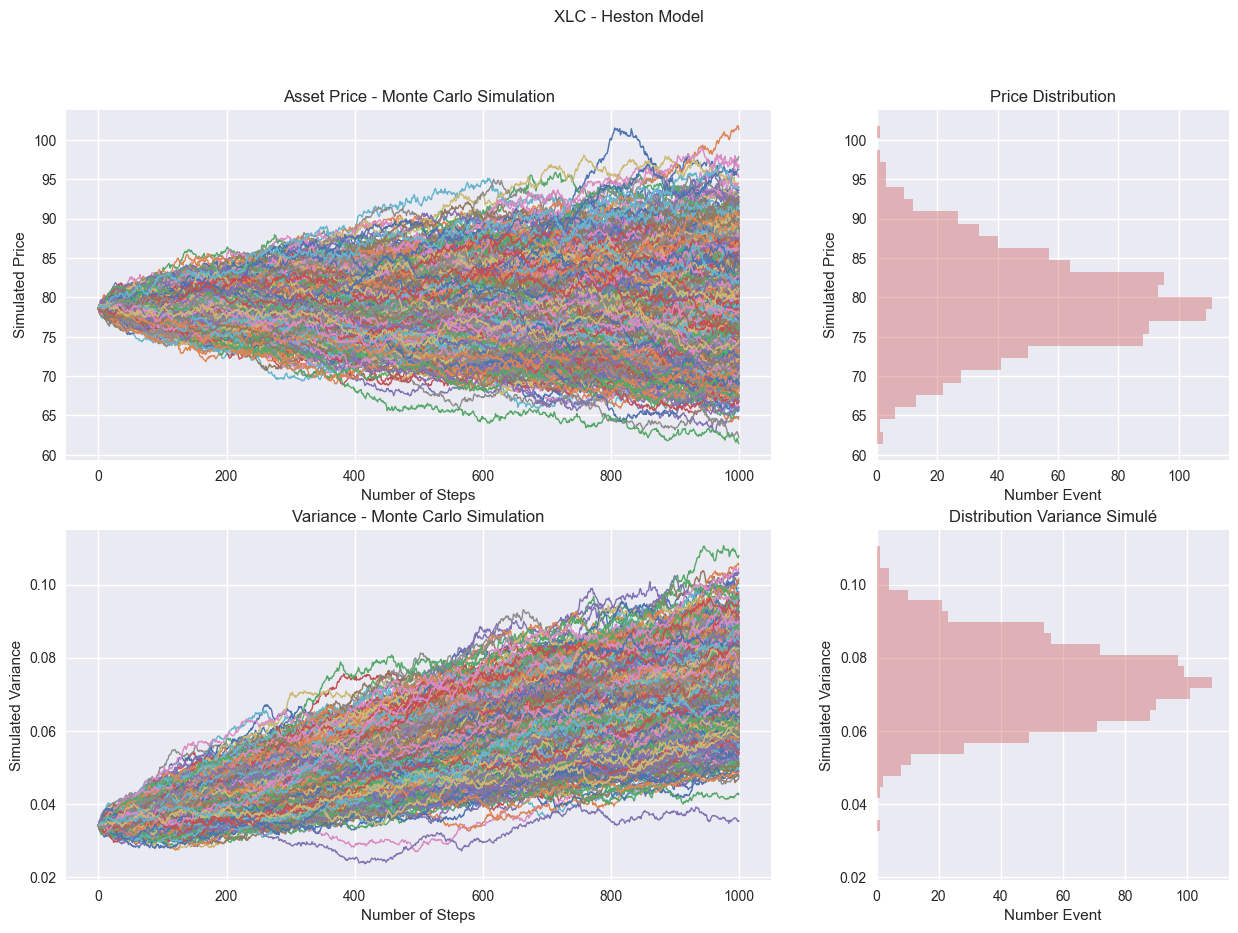

In [42]:
# Initialization of the graph, display multi graph
fig, ax = plt.subplots(2, 2, figsize=(15, 10), gridspec_kw={'width_ratios':[2,1]})
fig.suptitle(f'{etf_ticker} - Heston Model')

# Display the price Monte Carlo simulation
ax[0, 0].plot(etf_price_sim, linewidth=1)
ax[0, 0].set_xlabel('Number of Steps')
ax[0, 0].set_ylabel('Simulated Price')
ax[0, 0].set_title('Asset Price - Monte Carlo Simulation')

# Calculate the minimum and maximum price for scaling the distribution
min_price = etf_price_sim.min()
max_price = etf_price_sim.max()

# Display the price distribution at expiry
ax[0, 1].hist(etf_price_sim[-1], bins='auto', range=(min_price, max_price), orientation='horizontal', color='indianred', alpha=0.4)
ax[0, 1].set_xlabel('Number Event')
ax[0, 1].set_ylabel('Simulated Price')
ax[0, 1].set_title('Price Distribution')

# Display the variance Monte Carlo simulation
ax[1, 0].plot(etf_var_sim, linewidth=1)
ax[1, 0].set_xlabel('Number of Steps')
ax[1, 0].set_ylabel('Simulated Variance')
ax[1, 0].set_title('Variance - Monte Carlo Simulation')

# Calculate the minimum and maximum variance for scaling the distribution
min_var = etf_var_sim.min()
max_var = etf_var_sim.max()

# Display the variance distribution at expiry
ax[1, 1].hist(etf_var_sim[-1], bins='auto', range=(min_var, max_var), orientation='horizontal', color='indianred', alpha=0.4)
ax[1, 1].set_xlabel('Number Event')
ax[1, 1].set_ylabel('Simulated Variance')
ax[1, 1].set_title('Distribution Variance Simulé');

In [43]:
# Set the strike as the nearest round price (ATM)
strike = initial_price.round()

# Calculate the option price
option_price =  np.mean(np.maximum(etf_price_sim[-1] - strike, 0)) * np.exp(-rf_rate * time/nb_business_day)

# Display the option price
print(f'The {etf_ticker} Call Option @ {strike} is worth ${option_price.round(2)}')

The XLC Call Option @ 79.0 is worth $2.59


---

In [44]:
def get_option_price_heston(
    parameters_df,
    start_date,
    end_date,
    strike_list: float=None,
    put: bool=False,
    nb_business_day: float=252,
) -> pd.core.frame.DataFrame():
    """
    
    """

    # Set the columns name for the DataFrame
    columns = ['Type', 'Strike', 'Price', 'Expiry']

    # Get the assets ticker as list
    ticker_list = parameters_df.index.to_list()

    # Create a DataFrame to save the option prices
    option_price_df = pd.DataFrame(index=ticker_list, columns=columns)

    # Save into the DataFrame the type of option
    if put:
        # Set the options type as Put
        option_price_df['Type'] = 'Put'

    else:
        # Set the options type as Call
        option_price_df['Type'] = 'Call'

    # Get the time until expiry (end of the strategy)
    time = (end_date - start_date).days / nb_business_day

    # Set the options expiry in the DataFrame
    option_price_df['Expiry'] = str(end_date)

    # Save the stike in the DataFrame if it was given
    if strike_list is not None:
        option_price_df['Strike'] = strike_list

    # Find the option price for every
    for ticker in ticker_list:
        
        # Extract the asset parameters for the Heston model simulation
        initial_price, initial_variance, rf_rate, speed_mr, lt_mean, vol_of_var, correlation = parameters_df.loc[ticker]

        # Monte Carlo simulation with Heston model
        price_simulated, var_simulated = simulate_heston_model(initial_price, initial_variance, rf_rate, speed_mr,
                                                               lt_mean, vol_of_var, correlation, time)

        # If the strike is not previously set, we use the ATM strike with a round number of the current price
        if strike_list is None:
            # Roud the current price to have an approximation of the ATM strike
            strike = initial_price.round()

            # Save the strike into the DataFrame
            option_price_df.loc[ticker, 'Strike'] = strike

        else:
            # If the strike already exists, take it from the DataFrame
            strike = option_price_df.loc[ticker, 'Strike']

        # Compute the option price with the MonteCarlo simulation
        if put:
            # Calculate the option price for a Put option
            option_price =  np.mean(np.maximum(strike - price_simulated[-1], 0)) * np.exp(-rf_rate * time/nb_business_day)

        else:
            # Calculate the option price for a call option
            option_price =  np.mean(np.maximum(price_simulated[-1] - strike, 0)) * np.exp(-rf_rate * time/nb_business_day)

        # Save the option price into the DataFrame
        option_price_df.loc[ticker, 'Price'] = option_price

    return option_price_df

In [45]:
%%time

# Price the option with the Heston model for the ETF and its components
option_data_df = get_option_price_heston(heston_params_df, strategy_start_date, end_date, nb_business_day=nb_business_day)

# Display the options data
option_data_df

CPU times: total: 5.22 s
Wall time: 4.84 s


,Type,Strike,Price,Expiry
CHTR,Call,304.0,22.610856,2024-03-06
CMCSA,Call,45.0,1.962783,2024-03-06
DIS,Call,97.0,4.000808,2024-03-06
EA,Call,135.0,5.161261,2024-03-06
FOX,Call,29.0,1.201033,2024-03-06
...,...,...,...,...
TMUS,Call,161.0,5.353882,2024-03-06
TTWO,Call,164.0,6.915207,2024-03-06
VZ,Call,41.0,2.081094,2024-03-06
WBD,Call,10.0,0.641718,2024-03-06


In [46]:
def sim_option_history_heston(
    price_df: pd.core.frame.DataFrame,
    vol_df: pd.core.frame.DataFrame,
    heston_params_df: pd.core.frame.DataFrame,
    maturity_date: dt.date,
    striking_date: dt.date=None,
    nb_business_day: int=252,
) -> pd.core.frame.DataFrame:
    """
    Compute the option prices history with the Heston model
    For a given range of date, calculate the option prices history

    Args:
        price_df (pd.core.frame.DataFrame):
            DataFrame of underlying prices history.

        vol_df (pd.core.frame.DataFrame):
            DataFrame of underlying realised volatility history.

        heston_params_df (pd.core.frame.DataFrame):
            DataFrame of the Heston model parameters.

        maturity_date (dt.date):
            Date for the options expiry.

        striking_date (dt.date):
            Date to strike the options.

        nb_business_day (int):
            Number of business day in one year.

    Returns:
        call_df (pd.core.frame.DataFrame):
            Call option prices history.

        put_df (pd.core.frame.DataFrame):
            Put option prices history.
    """

    # Check if the price DataFrame and the volatility DataFrame have the same columns and rows
    if (price_df.columns != vol_df.columns).any() or (price_df.index != vol_df.index).any():

        # Raise an error if different
        raise ValueError

    # Get a list of tickers
    ticker_list = price_df.columns.to_list()

    # Get a list of dates
    date_list = price_df.index.to_list()

    # Calculate the number of date
    nb_date = len(date_list)

    # Initialize the DataFrame for the Call options
    call_df = pd.DataFrame(index=date_list, columns=ticker_list)

    # Initialize the DataFrame for the Put options
    put_df = pd.DataFrame(index=date_list, columns=ticker_list)

    # If no striking date is specify, use the first date as striking date
    if striking_date is None:
        # Round the first price and set it as strike
        strikes_list = price_df.iloc[0].to_numpy().round()

    else:
        # Convert the given date from dt.date to str
        striking_date_str = str(price_in_df.loc[:str(striking_date)].index[-1])

        # Get the strike for the corresponding date, we round it to fit with possible strike
        strikes_list = price_df.loc[striking_date_str].to_numpy().round()

    # Display message to indicate we start to price the options
    print('Pricing option..')

    # Run the pricing for every dates
    for date_index, date in enumerate(date_list):

        # Get the current date of pricing as str
        date_str = str(date).split(' ')[0]

        # Calculate the time between the current date and the expiry date
        time = (maturity_date - date.date()).days / nb_business_day

        # Display a message to indicate wich date we are pricing
        print(f'\t({date_index+1}/{nb_date}) {date_str}')

        # Run the pricing for every underlying in the list
        for ticker_index, ticker in enumerate(ticker_list):

            # Extract the asset parameters for the Heston model simulation
            _, _, rf_rate, speed_mr, lt_mean, vol_of_var, correlation = heston_params_df.loc[ticker]

            # Get the corresponding underlying price according to the given ticker and date
            price = price_df.loc[date, ticker]

            # Get the corresponding underlying variance according to the given ticker and date
            variance = vol_df.loc[date, ticker] ** 2

            # Get the corresponding underlying strike according to the given ticker and date
            strike = strikes_list[ticker_index]

            # Monte Carlo simulation with Heston model
            price_simulated, var_simulated = simulate_heston_model(price, variance, rf_rate, speed_mr,
                                                                   lt_mean, vol_of_var, correlation, time)

            # Compute the call price according to the Heston model simulation 
            call_price = np.mean(np.maximum(price_simulated[-1] - strike, 0)) * np.exp(-rf_rate * time/nb_business_day)

            # Compute the put price according to the Heston model simulation
            put_price = np.mean(np.maximum(strike - price_simulated[-1], 0)) * np.exp(-rf_rate * time/nb_business_day)

            # Save the call price into the DataFrame
            call_df.loc[date, ticker] = call_price

            # Save the call price into the DataFrame
            put_df.loc[date, ticker] = put_price

    return call_df, put_df

> Computing every option prices can be time-consuming. We simulated 1000 paths and 1000 steps for both price and volatility. Additionally, we need to calculate approximately 65 assets (depending on the chosen ETF) and simulate the price for about 40 dates.  
> **On average, it takes approximately 10 minutes to compute the option price history.**

In [47]:
%%time

"""
Compute the option price history
"""

# Compute the date 2 month before the end of the strategy, price option 1 month
# before the strategy and 1 month during the strategy
start_option_pricing = end_date - dt.timedelta(days=60)

# Only keep the corresponding dates for the option pricing
_, price_df = get_in_out_sample(components_prices_df, start_option_pricing)
_, vol_df = get_in_out_sample(components_vol_df, start_option_pricing)


# Simulate the option price history
assets_call_df, assets_put_df = sim_option_history_heston(price_df,
                                                          vol_df,
                                                          heston_params_df,
                                                          end_date,
                                                          strategy_start_date,
                                                          nb_business_day)

Pricing option..
	(1/40) 2024-01-08
	(2/40) 2024-01-09
	(3/40) 2024-01-10
	(4/40) 2024-01-11
	(5/40) 2024-01-12
	(6/40) 2024-01-16
	(7/40) 2024-01-17
	(8/40) 2024-01-18
	(9/40) 2024-01-19
	(10/40) 2024-01-22
	(11/40) 2024-01-23
	(12/40) 2024-01-24
	(13/40) 2024-01-25
	(14/40) 2024-01-26
	(15/40) 2024-01-29
	(16/40) 2024-01-30
	(17/40) 2024-01-31
	(18/40) 2024-02-01
	(19/40) 2024-02-02
	(20/40) 2024-02-05
	(21/40) 2024-02-06
	(22/40) 2024-02-07
	(23/40) 2024-02-08
	(24/40) 2024-02-09
	(25/40) 2024-02-12
	(26/40) 2024-02-13
	(27/40) 2024-02-14
	(28/40) 2024-02-15
	(29/40) 2024-02-16
	(30/40) 2024-02-20
	(31/40) 2024-02-21
	(32/40) 2024-02-22
	(33/40) 2024-02-23
	(34/40) 2024-02-26
	(35/40) 2024-02-27
	(36/40) 2024-02-28
	(37/40) 2024-02-29
	(38/40) 2024-03-01
	(39/40) 2024-03-04
	(40/40) 2024-03-05
CPU times: total: 3min 25s
Wall time: 3min 9s


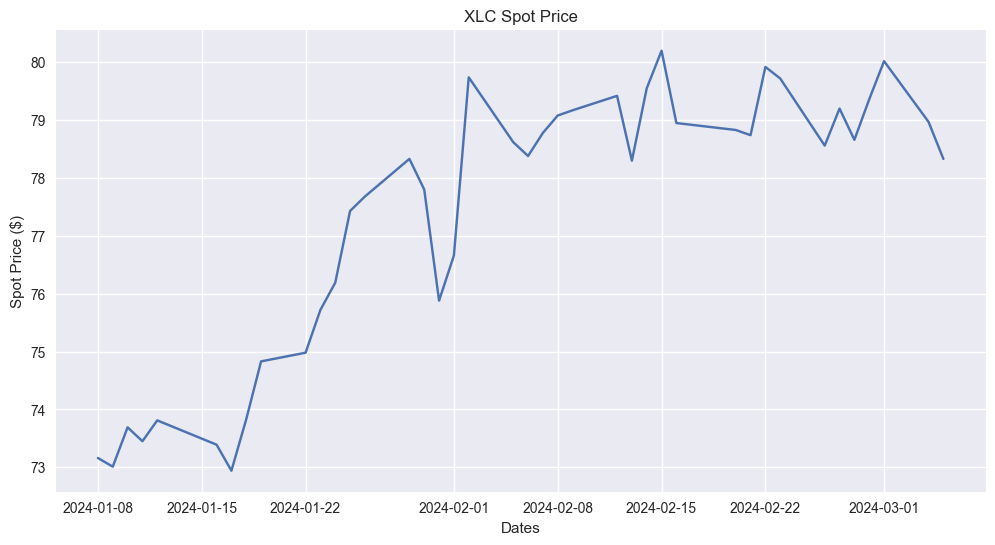

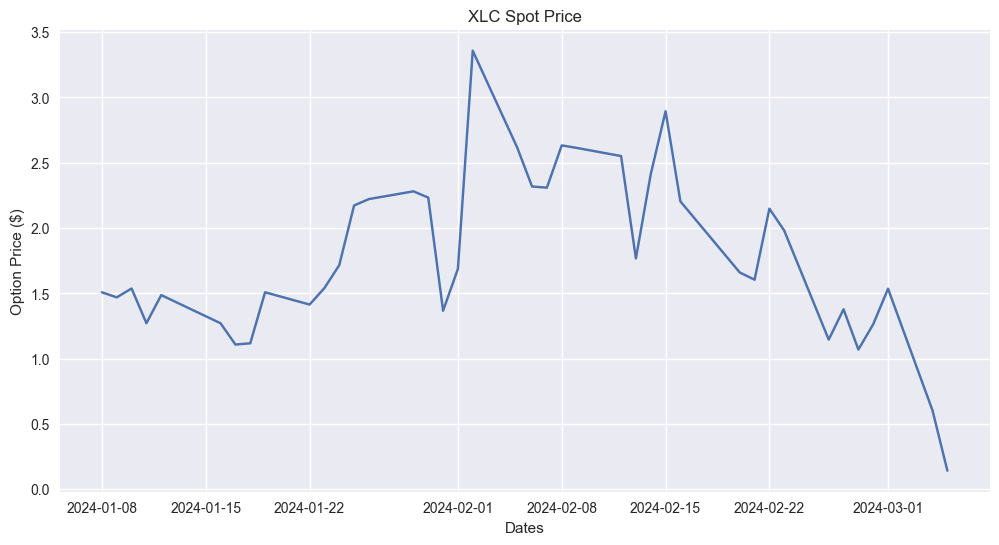

In [48]:
"""
Compare the ETF spot & option prices
"""

# Set the first graph for the spot price
plt.figure(1)

# Display the ETF price history
plt.plot(price_df[[etf_ticker]])

# Set the graph title
plt.title(f'{etf_ticker} Spot Price')

# Set the X and Y axis labels
plt.xlabel('Dates')
plt.ylabel('Spot Price ($)')


# Set the first graph for the option price
plt.figure(2)

# Display the ETF option price history
plt.plot(assets_call_df[[etf_ticker]])

# Set the graph title
plt.title(f'{etf_ticker} Spot Price')

# Set the X and Y axis labels
plt.xlabel('Dates')
plt.ylabel('Option Price ($)');

---

### 5. Implied Volatility
One of the key inputs in options pricing models, such as the **Black-Scholes model**, is the **expected volatility** of the underlying asset. This volatility is **not directly observable** but is instead *implied from the market prices of options**. By rearranging the options pricing model, traders can derive the implied volatility that would make the model's calculated option prices equal to the observed market prices.
  
Deriving implied volatility from option prices involves solving for the volatility parameter in an options pricing model, such as the Black-Scholes model, given observed market prices for the option and other relevant inputs. One commonly used method for this is the **Newton-Raphson** algorithm.

We want to solve the following equation:
$$
    Black-Scholes(\sigma_{impl}, rf, T, K, S_{0}) - V _{Call} ^{market} = 0
$$

Parameters $rf$, $T$, $K$ and $S_{0}$ are known:
$$
    Black-Scholes(\sigma_{impl}) - V _{Call} ^{market} = 0
$$

#### 5.1. Newton-Raphson

1. **Initial Guess:** To start, you need to make an initial guess for the value of implied volatility. This can be based on historical volatility, recent market movements, or other factors.

2. **Calculate Option Price:** Using the initial guess for volatility and the other inputs (such as the current price of the underlying asset, the strike price, time to expiration, interest rates, and dividends), calculate the theoretical price of the option using the options pricing model (e.g., Black-Scholes).

3. **Calculate Pricing Error:** Compare the calculated theoretical option price with the observed market price of the option. The pricing error is the the difference between the observed market price and the calculated theoretical price.

$$
    \text{Pricing Error} = V_{Call}^{BS}(IV_{estimate}) - V_{Call}^{market}
$$

4. **Update Volatility Guess:** Use the pricing error to update your guess for implied volatility. The Newton-Raphson algorithm updates the guess according to the formula:

$$
    IV_{new} = IV_{old} - \frac{\text{Pricing Error}}{Vega}
$$

5. **Repeat Steps 2-4:** Continue iterating the process until the pricing error is sufficiently small or until the changes in the implied volatility guess become negligible.

6. **Convergence:** Once the algorithm converges, the final value for implied volatility is the solution that makes the calculated theoretical option price equal to the observed market price.

In [49]:
def get_implied_vol(
    option_price: float,
    spot_price: float,
    strike: float,
    volatility: float,
    rf_rate: float,
    time: float,
    put: bool=False,
) -> float:
    """
    Find the implied volatility from the market price option
    Using Newtown-Raphson algorithm

    Args:
        option_price (float):
            Option price to determine implied volatility.
        
        spot_price (float):
            Current underlying price.
        
        strike (float):
            Option strike.
            
        volatility (float):
            Volatility of the underlying.
            
        rf_rate (float):
            Risk-free rate.
        
        time (float):
            Number of day until expiry, express in year.
            
        put (bool):
            Calculate a Put option price if True.
        
    Returns
        volatility: float
            Implied volatility of the option.
    """
    
    # Initialize the error term
    error_term = 1
    
    # Set the tolerance criterion
    tolerance_criterion = 0.000001

    # Run the program while the error term is superior to the tolerance criterion
    while error_term > tolerance_criterion:
    
        # Stop the loop if the volatility is equal to 0 or infinite
        if (volatility <= 0) or (np.isinf(volatility)):

            # Display an error message
            print('Optimization failed, can\'t find the implied volatility!')

            # In this case, set the volatility as NaN
            volatility = 0.0
            break
            
        else:
            # Calculate d1
            d1 = calculate_d1(spot_price, strike, volatility, rf_rate, time)
        
            # Calculate d2
            d2 = calculate_d2(spot_price, strike, volatility, rf_rate, time)

        
        if put:
            # Calculate the price of a put option
            option_price_estimated = get_option_price_bs(spot_price, strike, volatility, rf_rate, time, put=True)
            
        else:
            # Calculate the price of a call option
            option_price_estimated = get_option_price_bs(spot_price, strike, volatility, rf_rate, time)

        # Calculate the vega of the option
        vega = spot_price * np.sqrt(time) * sci.stats.norm.pdf(d1)

        
        # Stop the loop if the volatility is equal to 0 or infinite, or if the vega is negative
        if (vega <= 0) or (volatility <= 0) or (np.isinf(volatility)):

            # Display an error message
            print('Optimization failed, can\'t find the implied volatility!')

            # In this case, set the volatility as NaN
            volatility = 0.0
            break
            
        else:
            # Calculate the error term
            error_term = option_price - option_price_estimated
            
            # Adjust the volatility from the error
            volatility = volatility + (error_term)/(vega)

    # If the calculated volatility is negative, replace by 0.0
    if volatility < 0:
        # Set the volatility at 0.0
        volatility = 0.0
            
    return volatility

In [50]:
def sim_iv_history(
    option_df: pd.core.frame.DataFrame,
    price_df: pd.core.frame.DataFrame,
    vol_df: pd.core.frame.DataFrame,
    maturity_date: dt.date,
    striking_date: dt.date=None,
    nb_business_day: int=252,
    put: bool=False
) -> pd.core.frame.DataFrame:
    """
    Compute the implied volatility for a set of tickers and dates

    Args:
        option_df (pd.core.frame.DataFrame):
            DataFrame of options prices to determine the implied volatility.
        
        price_df (pd.core.frame.DataFrame):
            DataFrame of underlyings prices.
            
        vol_df (pd.core.frame.DataFrame):
            DataFrame of underlyings volatility.

        maturity (dt.date):
            Date of option expiry
            
        striking_date (dt.date):
            Date to strike the options.

        nb_business_day (int):
            Number of business day in one year.
            
        put (bool):
            Calculate a Put option price if True.

    Args:
        iv_option_df (pd.core.frame.DataFrame):
            DataFrame of implied volatility for every underlyings and dates.
    """

    # Check if the price DataFrame and the volatility DataFrame have the same columns and rows
    if (price_df.columns != vol_df.columns).any() or (price_df.index != vol_df.index).any():
        raise ValueError

    # Get the list of tickers
    ticker_list = price_df.columns.to_list()

    # Get the list of dates
    date_list = price_df.index.to_list()

    # Set the DataFrame to save the implied volatility
    iv_option_df = pd.DataFrame(index=date_list, columns=ticker_list)

    # If no striking date is specify, use the first date as striking date
    if striking_date is None:
        # Round the first price and set it as strike
        strikes_list = price_df.iloc[0].to_numpy().round()

    else:
        # Convert the given date from dt.date to str
        striking_date_str = str(price_in_df.loc[:str(striking_date)].index[-1])

        # Get the strike for the corresponding date, we round it to fit with possible strike
        strikes_list = price_df.loc[striking_date_str].to_numpy().round()

    # Get the risk-free rate (SOFR)
    rf_rate = get_SOFR()

    # Run the computation for every dates
    for date_index, date in enumerate(date_list):

        # Calculate the time between the current date and the expiry date
        time = (maturity_date - date.date()).days / nb_business_day

        # Run the computation for every tickers
        for ticker_index, ticker in enumerate(ticker_list):

            # Get the corresponding option price according to the given ticker and date
            option_price = option_df.loc[date, ticker]

            # Get the corresponding underlying price according to the given ticker and date
            spot_price = price_df.loc[date, ticker]

            # Get the corresponding underlying strike according to the given ticker and date
            strike = strikes_list[ticker_index]

            # Get the corresponding underlying volatility according to the given ticker and date
            volatility = vol_df.loc[date, ticker]

            # Compute the implied volatility for the current date and ticker
            iv_option = get_implied_vol(option_price, spot_price, strike, volatility, rf_rate, time, put)

            # Save the implied volatility into the DataFrame
            iv_option_df.loc[date, ticker] = iv_option

    return iv_option_df

In [51]:
"""
Compute the Call & Put Implied Volatility
"""

# Simulate the call implied volatility
iv_call_df = sim_iv_history(assets_call_df, price_df, vol_df, end_date, strategy_start_date, nb_business_day)

# Simulate the put implied volatility
iv_put_df = sim_iv_history(assets_call_df, price_df, vol_df, end_date, strategy_start_date, nb_business_day, True)

Optimization failed, can't find the implied volatility!
Optimization failed, can't find the implied volatility!
Optimization failed, can't find the implied volatility!
Optimization failed, can't find the implied volatility!
Optimization failed, can't find the implied volatility!
Optimization failed, can't find the implied volatility!
Optimization failed, can't find the implied volatility!
Optimization failed, can't find the implied volatility!
Optimization failed, can't find the implied volatility!


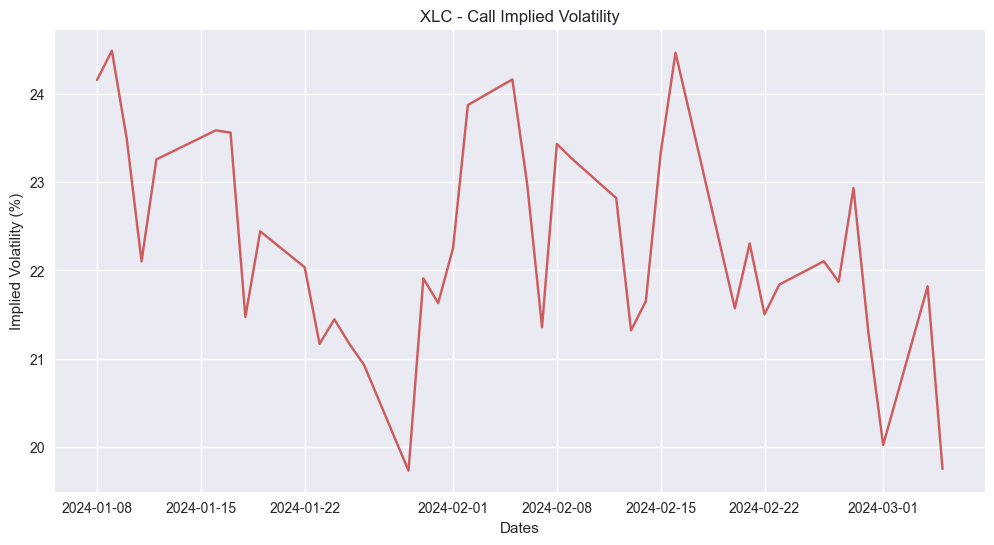

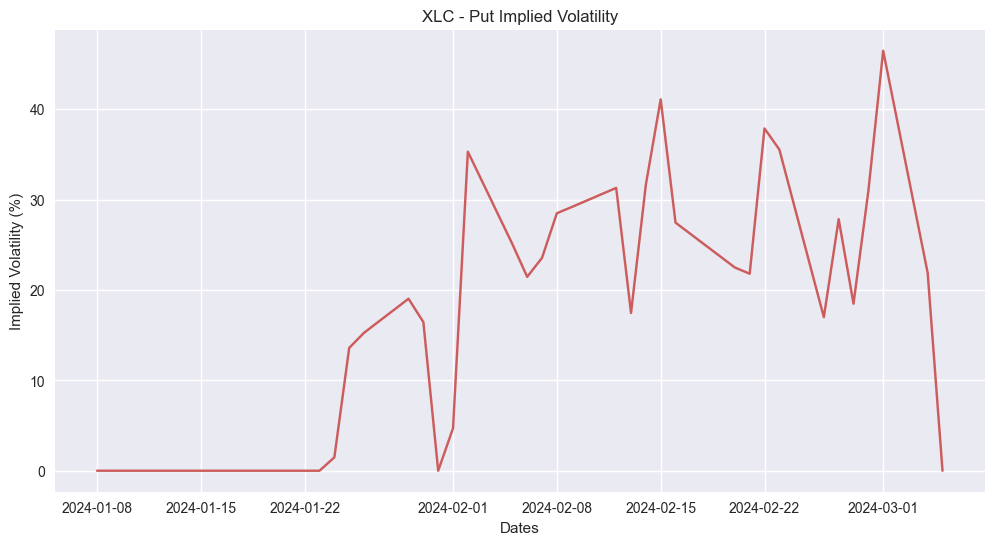

In [52]:
"""
Compare the ETF Implied Volatility for Call & Put
"""

# Set the first graph for the Call Implied Volatility
plt.figure(1)

# Display the ETF Call Implied Volatility
plt.plot(iv_call_df[[etf_ticker]] * 100, c='indianred')

# Set the graph title
plt.title(f'{etf_ticker} - Call Implied Volatility')

# Set the X and Y axis labels
plt.xlabel('Dates')
plt.ylabel('Implied Volatility (%)')


# Set the first graph for the Put Implied Volatility
plt.figure(2)

# Display the ETF Put Implied Volatility
plt.plot(iv_put_df[[etf_ticker]] * 100, c='indianred')

# Set the graph title
plt.title(f'{etf_ticker} - Put Implied Volatility')

# Set the X and Y axis labels
plt.xlabel('Dates')
plt.ylabel('Implied Volatility (%)');

---

### 6. Option Greeks
The Greeks are a set of risk measures used in options trading to assess the sensitivity of an option's price to changes in various factors. These factors include the price of the underlying asset, volatility, time to expiration, and interest rates. Here are the main Greeks and what they represent:

#### 6.1. Delta
**Delta** measures the sensitivity of an option's price to changes in the price of the underlying asset. It represents the change in the option price for a one-unit change in the price of the underlying asset. Delta is expressed as a value between $0$ and $1$ for call options and between $0$ and $-1$ for put options. 

$$
    \Delta = \frac{\partial P}{\partial S}
$$

**Call Delta**  
$\Delta_{Call} = \Phi(d_1)$

**Put Delta**  
$\Delta_{Put} = \Phi(- d_1)$

In [53]:
def get_delta(
    price: float,
    strike: float,
    volatility: float,
    rf_rate: float,
    time: float,
    put: bool=None
) -> float:
    """
    Compute the Delta of an option

    Args:
        price (float):
            Underlying price.

        strike (float):
            Option strike.
        
        volatility (float):
            Underlying volatility (realised or implied).

        rf_rate (float):
            Risk-free rate.

        time (float):
            Time until expiry, express in year.

        put (bool):
            Calculate a Put Delta if True.

    Returns:
        delta (float):
            Option Delta.
    """

    # Calculate the d1 of Black-Scholes formula
    d1 = calculate_d1(price, strike, volatility, rf_rate, time)

    # Chack if the option is a Call or Put
    if put:
        # Compute the Put Delta
        delta = -sci.stats.norm.cdf(-d1)

    else:
        # Compute the Call Delta
        delta = sci.stats.norm.cdf(d1)

    return delta

#### 6.2. Gamma
**Gamma** measures the rate of change of delta with respect to changes in the price of the underlying asset. It represents the change in delta for a one-unit change in the price of the underlying asset. Gamma is highest for at-the-money options and decreases as the option moves further into the money or out of the money. It is used to assess the convexity of an option's price curve.

$$
    \Gamma = \frac{\partial ^{2} P}{\partial S ^{2}} = \frac{\partial \Delta}{\partial S}
$$

**Call & Put Gamma**  
$\Gamma = \frac{\varphi(d_1)}{S \sigma \sqrt(t)}$

In [54]:
def get_gamma(
    price: float,
    strike: float,
    volatility: float,
    rf_rate: float,
    time: float,
) -> float:
    """
    Compute the Gamma of an option

    Args:
        price (float):
            Underlying price.

        strike (float):
            Option strike.
        
        volatility (float):
            Underlying volatility (realised or implied).

        rf_rate (float):
            Risk-free rate.

        time (float):
            Time until expiry, express in year.

    Returns:
        gamma (float):
            Option Gamma.
    """

    # Calculate the d1 of Black-Scholes formula
    d1 = calculate_d1(price, strike, volatility, rf_rate, time)

    # Compute the Gamma of the option
    gamma = sci.stats.norm.pdf(d1) / (price * volatility * np.sqrt(time))

    return gamma

#### 6.3. Vega
**Vega** measures the sensitivity of an option's price to changes in implied volatility. It represents the change in the option price for a one-unit change in implied volatility. Vega is highest for at-the-money options and decreases as the option moves further into or out of the money. Traders use vega to assess the impact of changes in volatility on option prices.

$$
    \nu = \frac{\partial P}{\partial \sigma}
$$

**Call & Put Vega**  
$\nu = S \varphi(d_1) \sqrt{t} = K \exp^{-rt} \varphi(d_2) \sqrt{t}$

In [55]:
def get_vega(
    price: float,
    strike: float,
    volatility: float,
    rf_rate: float,
    time: float,
) -> float:
    """
    Compute the Vega of an option

    Args:
        price (float):
            Underlying price.

        strike (float):
            Option strike.
        
        volatility (float):
            Underlying volatility (realised or implied).

        rf_rate (float):
            Risk-free rate.

        time (float):
            Time until expiry, express in year.

    Returns:
        vega (float):
            Option Vega.
    """

    # Calculate the d1 of Black-Scholes formula
    d1 = calculate_d1(price, strike, volatility, rf_rate, time)

    # Compute the Vega of the option
    vega = price * sci.stats.norm.pdf(d1) * np.sqrt(time)

    return vega / 100

#### 6.4. Rho
**Rho** measures the sensitivity of an option's price to changes in interest rates. It represents the change in the option price for a one-unit change in the risk-free interest rate. Rho is generally more significant for longer-dated options and is more relevant in markets where interest rates are volatile.

$$
    \rho = \frac{\partial P}{\partial r_f}
$$

**Call Rho**  
$\rho_{Call} = K t \exp^{-rt} \Phi(d_2)$

**Put Rho**  
$\rho_{Put} = -K t \exp^{-rt} \Phi(-d_2)$

In [56]:
def get_rho(
    price: float,
    strike: float,
    volatility: float,
    rf_rate: float,
    time: float,
    put: bool=None
) -> float:
    """
    Compute the Rho of an option

    Args:
        price (float):
            Underlying price.

        strike (float):
            Option strike.
        
        volatility (float):
            Underlying volatility (realised or implied).

        rf_rate (float):
            Risk-free rate.

        time (float):
            Time until expiry, express in year.

        put (bool):
            Calculate a Put Rho if True.

    Returns:
        rho (float):
            Option Rho.
    """

    # Calculate the d2 of Black-Scholes formula
    d2 = calculate_d2(price, strike, volatility, rf_rate, time)

    # Chack if the option is a Call or Put
    if put:
        # Compute the Put Rho
        rho = -strike * time * np.exp(-rf_rate*time) * sci.stats.norm.cdf(-d2)

    else:
        # Compute the Call Rho
        rho = strike * time * np.exp(-rf_rate*time) * sci.stats.norm.cdf(d2)

    return rho / 100

#### 6.5. Theta
**Theta** measures the rate of change of an option's price with respect to the passage of time. It represents the change in the option price for a one-unit decrease in time to expiration. Theta is typically negative for long options and positive for short options, as options lose value over time due to the erosion of extrinsic value (time value). Traders use theta to assess the impact of time decay on option prices.

$$
    \theta = \frac{\partial P}{\partial T}
$$

**Call Theta**  
$\theta_{Call} = - \frac{S \varphi(d_1) \sigma}{2 \sqrt{t}} - rK \exp^{-rt} \Phi(d_2)$

**Put Theta**  
$\theta_{Put} = - \frac{S \varphi(d_1) \sigma}{2 \sqrt{t}} + rK \exp^{-rt} \Phi(-d_2)$

In [57]:
def get_theta(
    price: float,
    strike: float,
    volatility: float,
    rf_rate: float,
    time: float,
    put: bool=None
) -> float:
    """
    Compute the Theta of an option

    Args:
        price (float):
            Underlying price.

        strike (float):
            Option strike.
        
        volatility (float):
            Underlying volatility (realised or implied).

        rf_rate (float):
            Risk-free rate.

        time (float):
            Time until expiry, express in year.

        put (bool):
            Calculate a Put Theta if True.

    Returns:
        theta (float):
            Option Theta.
    """

    # Calculate the d1 of Black-Scholes formula
    d1 = calculate_d1(price, strike, volatility, rf_rate, time)

    # Calculate the d2 of Black-Scholes formula
    d2 = calculate_d2(price, strike, volatility, rf_rate, time)

    # Chack if the option is a Call or Put
    if put:
        # Compute the Put Theta
        theta = - (price * sci.stats.norm.pdf(d1) * volatility) / (2 * np.sqrt(time)) + rf_rate * strike * np.exp(-rf_rate * time) * sci.stats.norm.cdf(-d2)

    else:
        # Compute the Call Theta
        theta = - (price * sci.stats.norm.pdf(d1) * volatility) / (2 * np.sqrt(time)) - rf_rate * strike * np.exp(-rf_rate * time) * sci.stats.norm.cdf(d2)

    return theta / 252

---

### 7. Straddle
There are various methods for managing a dispersion trading strategy, including **Variance Swap**, **Volatility Swap**, **Gamma Swap**, or **Straddle**. While the Swap methods are efficient, the limited liquidity of these products reduces their usability. In our case, the straddle method aligns better with our goals and is more in line with the content covered in the Hedging & Trading Strategies course.

---

A **Straddle** is an options trading strategy that involves **purchasing both a call option and a put option on the same underlying asset with the same expiration date and strike price**. The straddle strategy is used when an investor expects a significant price movement in the underlying asset but is unsure about the direction of the movement.

In [58]:
def get_straddle_price(
    call_price: float,
    put_price: float,
) -> float:
    """
    Calculate a Straddle Price
    Buy Call & Buy Put

    Args:
        call_price (float):
            Call option price.

        put_price (float):
            Put option price.

    Returns:
        straddle_price (float):
            Straddle price.
    """

    # Calculate the Straddle price
    straddle_price = call_price + put_price

    return straddle_price

#### 7.1. Straddle Delta
The **Delta of a Straddle** is the combined delta of the call and put options that make up the straddle position. Since a straddle involves buying both a call option and a put option with the same strike price and expiration date, the delta of the straddle is the sum of the deltas of the individual call and put options.

The Straddle Delta is between -1 and 1.

$$
    \Delta_{Straddle} = \Delta_{call} + \Delta_{Put}
$$

In [59]:
def get_straddle_delta(
    call_delta: float,
    put_delta: float,
) -> float:
    """
    Calculate a Straddle Delta
    Sum of the Call and Put Delta

    Args:
        call_delta (float):
            Call option Delta.

        put_delta (float):
            Put option Delta.

    Returns:
        straddle_delta (float):
            Straddle Delta.
    """

    # Calculate the Straddle Delta
    straddle_delta = call_delta + put_delta

    return straddle_delta

#### 7.2. Straddle Theta
The **Theta of a Straddle** represents the rate of change of the straddle's value with respect to the passage of time. Theta measures how much the value of the straddle will decrease as time passes, all other factors being constant. Since a straddle consists of both a call option and a put option with the same expiration date, the theta of the straddle is the sum of the thetas of the individual call and put options.

$$
    \theta_{Straddle} = \theta_{call} + \theta_{Put}
$$

Since both the call and put options have negative thetas, the theta of the straddle will also be negative. This indicates that the value of the straddle will decrease over time, assuming all other factors remain constant.

In [60]:
def get_straddle_theta(
    call_theta: float,
    put_theta: float,
) -> float:
    """
    Calculate a Straddle Theta
    Sum of the Call and Put Theta

    Args:
        call_theta (float):
            Call option Theta.

        put_theta (float):
            Put option Theta.

    Returns:
        straddle_theta (float):
            Straddle Theta.
    """

    # Calculate the Straddle Theta
    straddle_theta = call_theta + put_theta

    return straddle_theta

---

## III. Dispersion Trading

**Dispersion Trading involves** the recreation of an index option by utilizing options on individual component stocks.

Because **implied correlation** levels are typically overpriced, often a result of structured product sellers maintaining short correlation positions, index implied volatility tends to be more costly compared to the implied volatility of individual stocks. In a long dispersion trade, one aims to capitalize on this situation by selling index implied volatility while simultaneously buying single-stock implied volatility. This strategy effectively takes a short position on implied correlation. Although dispersion trading is a prevalent approach for trading implied correlation, the payoff is also dependent on the level of volatility.
  
If the **Index Arbitrage** is to reconstruct an inde or ETF using component stocks, the **Dispersion Trading** is to reconstruct an index option using options on the component stocks. 

> A Dispersion Trading strategy operates in a market-neutral manner, meaning its performance is independent of overall market movements. Typically employed by Hedge Funds, Proprietary Trading Firms, and Flow Desks, this strategy is designed for professional use and does not require management of client risk aversion.

### 1. Index Dispersion Measures

#### 1.1. Index Replication

$$
    r_I = \sum_{i=1} ^{N} w_i r_i
$$

In [61]:
# Get the in-sample and out-sample of the ETF and components prices
price_in_df, price_out_df = get_in_out_sample(components_prices_df, strategy_start_date)

# Calculate the return of the index
replication_etf = components_weight @ price_in_df[components_ticker].pct_change().T + 1

# Set the first value of the index at 100
replication_etf.iloc[0] = 100

# Cumulate the return to obtain the price of the index
replication_etf = replication_etf.cumprod()

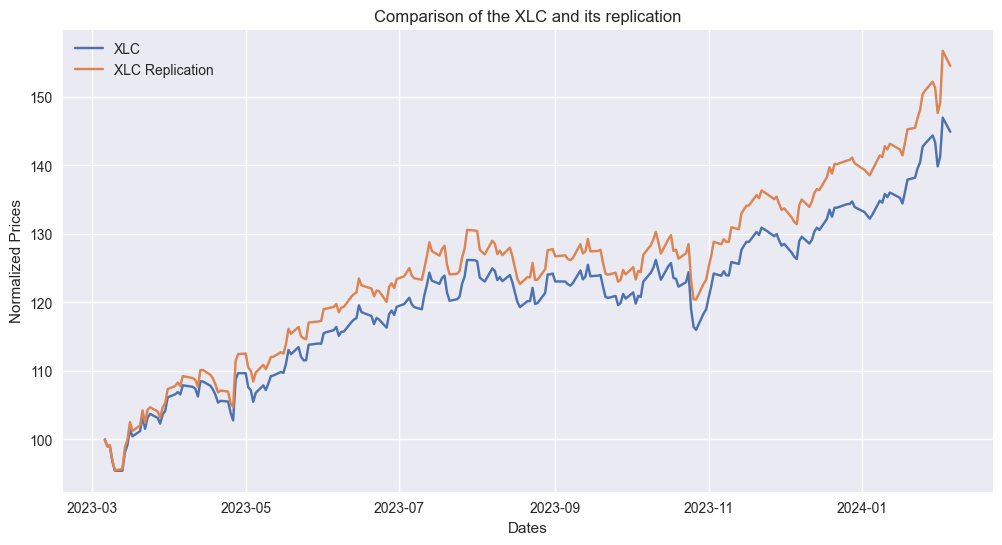

In [62]:
# Set the columns name for the DataFrame
columns = [etf_ticker, etf_ticker + ' Replication']

# Creat the DataFrame to save the price of the ETF and its replication
etf_comparison_df = pd.DataFrame(index=price_in_df.index, columns=columns)

# Save the real ETF price into the DataFrame
etf_comparison_df[etf_ticker] = price_in_df[etf_ticker]

# Save the replicated ETF price into the DataFrame
etf_comparison_df[etf_ticker + ' Replication'] = replication_etf

# Normalized the price to be comparable
etf_norm_df = normalize_pct(etf_comparison_df)

"""
Display the real ETF and its replication
"""
# Display the real ETF and its replication
plt.plot(etf_norm_df)

plt.title(f'Comparison of the {etf_ticker} and its replication')

# Set the X and Y axis labels
plt.xlabel('Dates')
plt.ylabel('Normalized Prices')

# Set the legend of the graph
plt.legend(etf_norm_df.columns);

The spread between the constructed portfolio and the ETF is primarily attributable to the fixed weights. Although we lack the data for a perfect fit to our model, this discrepancy will persist during the dispersion trade. We do not plan to adjust the weights of the options, meaning that while the ETF will be adjusted with changing weights, our portfolio will remain static.

#### 1.2. Index Variance

$$
    \sigma_I^2 = \sum_{i=1} ^{N} w_i^2 \sigma_i^2 + 2 \sum_{i=1} ^{N-1} \sum_{j > i} ^{N} w_i w_j \sigma_i \sigma_j \rho_{i, j}
$$

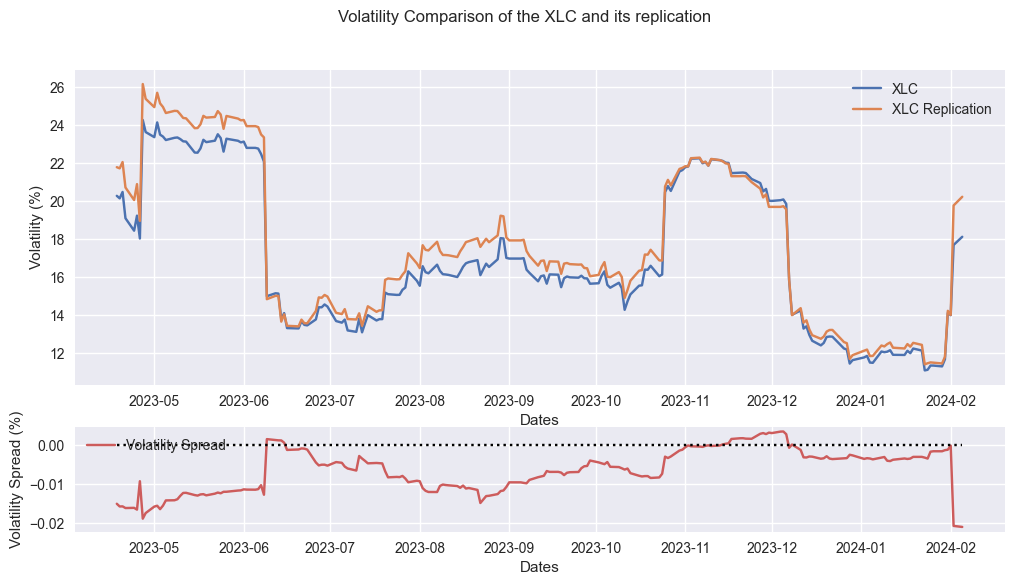

In [63]:
# Calculate the rolling volatility
etf_vol_df = get_realised_vol(etf_norm_df)

"""
Display the real ETF volatility and its replication
"""
# Set the graph composition, number of raw and columns and size/ratio
fig, ax = plt.subplots(2, 1, gridspec_kw={'height_ratios':[3,1]})

# Set the graph title
fig.suptitle(f'Volatility Comparison of the {etf_ticker} and its replication')

# Display the ETF volatility and  the ETF replication volatility
ax[0].plot(etf_vol_df * 100)
ax[0].set_xlabel('Dates')
ax[0].set_ylabel('Volatility (%)')

# Set the legend of the graph
ax[0].legend(etf_vol_df.columns);

# Calculate the volatility spread
vol_spread = etf_vol_df.iloc[:, 0] - etf_vol_df.iloc[:, 1]

# Display the volatility spread on the second chart
ax[1].plot(vol_spread, color='indianred')

# Display an horizontal line for the 0.0 spread
ax[1].hlines(0, vol_spread.index[0], vol_spread.index[-1], color='black', linestyles=':')

# Set the x and y axis labels
ax[1].set_xlabel('Dates')
ax[1].set_ylabel('Volatility Spread (%)')

# Set the legend of the graph
ax[1].legend(['Volatility Spread']);

#### 1.3. Volatility Boundaries
The volatility of an index is capped by the weighted average volatility of its members:
$$
    0 \le \sigma_I \le \sum_{i=1} ^{N} w_i \sigma_i
$$

with:
- $\sigma_I$: Index volatility
- $\sigma_i$ Volatility of the $i^{th}$ asset
- $w_i$: Weight of the $i^{th}$ asset

> One significant drawback is the dynamic nature of the weights, which contrasts with the static nature of our data. Given the challenge of acquiring dynamic weights, we will proceed under the assumption that the current weights reflect both past and future ETF component weights.

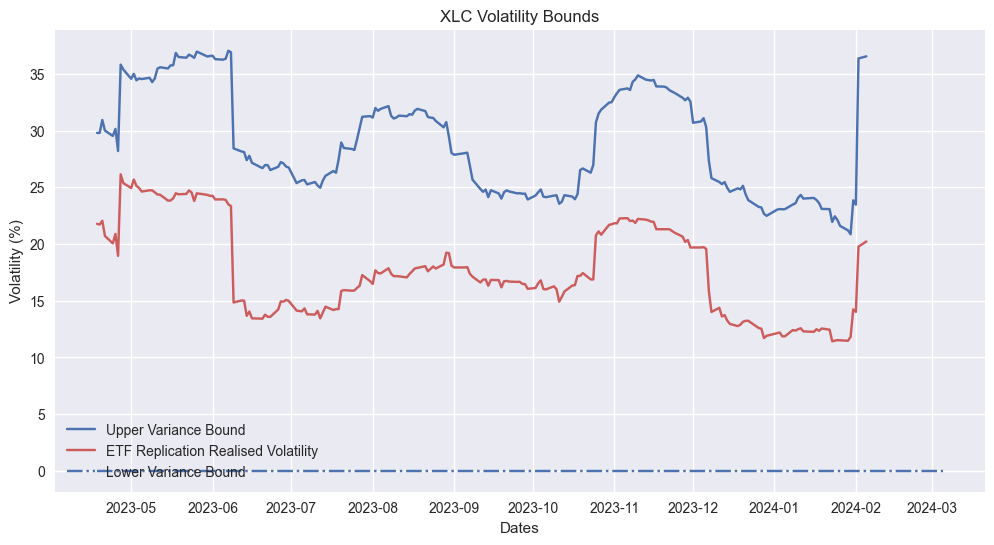

In [64]:
# Calculate the upper volatility bound (weighted average components volatility)
upper_bound_vol = vol_in_sample_df[components_ticker] @ np.array(components_weight)

# Display the upper volatility bound
plt.plot(upper_bound_vol * 100, label='Upper Variance Bound')

# Display the ETF realised volatility
plt.plot(etf_vol_df[etf_ticker + ' Replication'] * 100, label='ETF Replication Realised Volatility', c='indianred')

# Display the lower volatility bound (0)
plt.hlines(0.0, components_vol_df.index[0], components_vol_df.index[-1], linestyles='-.', label='Lower Variance Bound')

# Set the title of the graph
plt.title(f'{etf_ticker} Volatility Bounds')

# Set the x and y axis label
plt.xlabel('Dates')
plt.ylabel('Volatility (%)')

# Set the legend of the graph
plt.legend();

#### 1.4. Index Correlation 
Dispersion trading involves trading the spread between realized correlation and implied correlation.

##### Realised Correlation
We can compute the realised correlation as follow:
$$
    \rho_{realised} = 
        \frac
        {\sigma_I^2 - \sum_{i=1} ^{N} w_i^2 \sigma_{i, realised}^2}
        {2 \sum_{i=1} ^{N-1} \sum_{j > i} ^{N} w_i w_j \sigma_{i, realised} \sigma_{j, realised}}
$$

##### Implied Correlation
And we can express the implied correlation 
$$
    \rho_{imp} = \frac
        {\sigma_I^2 - \sum_{i=1} ^{N} w_i^2 \sigma_{i, implied}^2}
        {2 \sum_{i=1} ^{N-1} \sum_{j > i} ^{N} w_i w_j \sigma_{i, implied} \sigma_{j, implied}}
$$

---

In [65]:
def get_index_correlation(
    index_vol: np.ndarray,
    components_vol: np.ndarray,
    components_weight: np.ndarray,
) -> np.ndarray:
    """
    Compute the index correlation (realised or implied)

    Args:
        index_vol (np.ndarray):
            Index volatility.

        components_vol (np.ndarray):
            Index components volatility.

        components_weight (np.ndarray):
            Index components weight.

    Returns:
        index_correlation (np.ndarray):
            Index Correlation.
    """

    # Calculate the numerator of the correlation formula
    numerator_array = index_vol**2 - (components_vol**2 @ components_weight**2)

    # Calculate the denominator of the correlation formula
    denominator_array = 2 * sum(w1 * w2 * sigma_i * sigma_j 
                          for i, w1 in enumerate(components_weight) 
                          for j, w2 in enumerate(components_weight) if j > i 
                          for sigma_i, sigma_j in zip(components_vol.T, components_vol.T))

    # Calculate the index correlation history
    index_correlation = numerator_array / denominator_array

    return index_correlation

In [66]:
# Format the index realised volatility as Numpy array
index_vol_array = vol_df.loc[:, etf_ticker].to_numpy()

# Format the components realised volatility as Numpy array
components_vol_array = vol_df.loc[:, components_ticker].to_numpy()

# Format the component call implied volatility as Numpy array
components_iv_call_array = iv_call_df.loc[:, components_ticker].to_numpy()

# Format the component put implied volatility as Numpy array
components_iv_put_array = iv_put_df.loc[:, components_ticker].to_numpy()

# Compute the realised correlation
realized_corr_array = get_index_correlation(index_vol_array, components_vol_array, components_weight)

# Compute the implied call correlation
iv_call_corr_array = get_index_correlation(index_vol_array, components_iv_call_array, components_weight)

# Compute the implied put correlation
iv_put_corr_array = get_index_correlation(index_vol_array, components_iv_put_array, components_weight)

# Initialized the correlation DataFrame
correlation_df = pd.DataFrame(index=vol_df.index)

# Save the realised correlation into the DataFrame
correlation_df['Realised Correlation'] = realized_corr_array

# Save the call implied correlation into the DataFrame
correlation_df['Implied Correlation (Call)'] = iv_call_corr_array

# Save the put implied correlation into the DataFrame
correlation_df['Implied Correlation (Put)'] = iv_put_corr_array

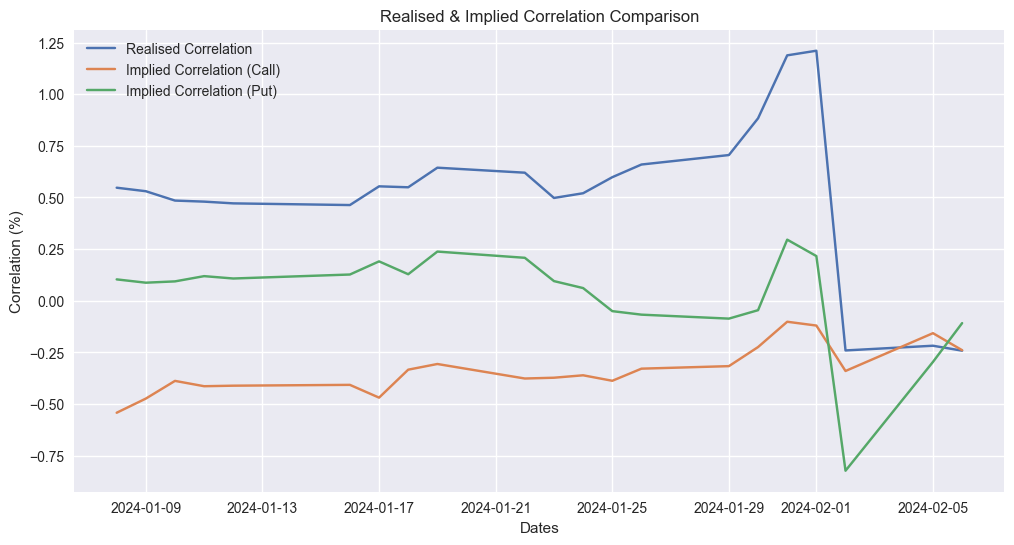

In [67]:
"""
Display the Realised Correlation & Implied Correlation
"""
# Display the realised & implied correlation
plt.plot(correlation_df.loc[:strategy_start_date] * 100);

# Set the graph title
plt.title('Realised & Implied Correlation Comparison')

# Set the X and Y axis label
plt.xlabel('Dates')
plt.ylabel('Correlation (%)')

# Set the legend of the graph
plt.legend(correlation_df.columns);

---

### 2. Weighting for Dispersion Trades
While a dispersion trade always involves a short index volatility position and a long single stock volatility position, there are different strategies for calculating the ratio of the two trade legs..

#### 2.1. Vega Weighted
In a **vega-weighted** dispersion strategy, the index vega equals the sum of the single-stock vega. If both the index and single-stock vega increase by one volatility point, the two legs cancel each other out, resulting in neither a loss nor a profit for the trade.

$$
    vega_{I} = \sum _{i=1} ^{N} vega_i
$$.

#### 2.2. Theta Weighted
**Theta weighting** implies that the $vega \times \sigma$ is equal on both legs. This entails having a smaller single-stock vega leg compared to vega weighting, since single-stock volatility is larger than index volatility, resulting in a smaller vega to maintain $vega \times \sigma$ equality.
In theta-weighted dispersion, if all securities have zero volatility, the theta of both the long and short legs cancels out, resulting in total theta being zero. **Theta weighting can be seen as correlation-weighted**, as the correlation is approximately equal to the index variance divided by the average single-stock variance, which represents the ratio of single-stock vega to index vega. If volatility rises by 1% (relative move), the two legs cancel each other out and the dispersion strategy breaks even.s even.

In [68]:
def get_theta_error(
    weight: np.ndarray[float],
    index_theta: float,
    component_theta: np.ndarray[float],
) -> float:
    """
    Calculate the error between the replicted index theta and the index theta

    Args:
        weight (np.ndarray[float]):
            Weight of the index components.

        index_theta (float):
            Theta of the index.

        component_theta (np.ndarray[float]):
            Theta of the index components.

    Returns:
        error (float):
            Spread between the theta of the index replication and theta of the index
    """

    # Calculate the theta of the replicated index
    replicate_index_theta = sum(weight * component_theta)

    # Calculate the error
    error = (index_theta - replicate_index_theta)**2

    return error

In [69]:
def get_theta_weighting(
    weight: np.ndarray[float],
    index_theta: float,
    component_theta: np.ndarray[float],
) -> np.ndarray:
    """
    Calibrate the weight to be Theta neutral
    So-called Theta-Weighting

    Args:
        weight (np.ndarray[float]):
            Weight of the index components.

        index_theta (float):
            Theta of the index.

        component_theta (np.ndarray[float]):
            Theta of the index components.

    Returns:
        theta_weight (np.ndarray[float]):
            Weight of the index components which neutralize the Theta.
    """

    # Set a constraint to have sum of weight equal to 1
    constraints = ({'type': 'eq', 'fun': lambda x : sum(x)-1})

    # Set the weights boundaries
    bounds = [(0, 1)] * len(weight)

    # Minimize the error
    optimization = sci.optimize.minimize(get_theta_error, weight, args=(index_theta, component_theta), bounds=bounds, constraints=constraints)

    # Check if the optimization succeed
    if optimization['success'] == False:

        # Display an error message
        print('Theta neutralization failed !')

    # Get the weighting to be theta neutral
    theta_weight = optimization['x']

    return theta_weight

#### 2.3. Gamma Weighted
**Gamma weighting** is the **least commonly used method** among the three types of dispersion trading strategies. Since gamma is proportional to vega divided by volatility, the vega divided by volatility of both legs must be equal. Given that single-stock volatility is typically greater than index volatility, the single-stock vega leg is larger compared to vega-weighted dispersion.d.

---

## IV. Strategy Back-testing 
> It will be challenging to provide commentary on this section, as the results we are obtaining are markedly divergent from those your simulation will generate. Given the time-sensitive nature of our strategy, which was specifically constructed to operate during the past month, significant differences in outcomes are anticipated. Nonetheless, we will make note of our observations..

### 1. Strategy Summary

In [70]:
# Set an initial amout to manage the Dispersion Trading Book
initial_AUM = 1000000

# Display an introduction to present the strategy
print(f'We will implement a dispersion trading strategy on the {etf_ticker} and its components.')
print(f'Our portfolio, initiated with ${initial_AUM}, will be analyzed for performance from {strategy_start_date}, to {end_date}.')

We will implement a dispersion trading strategy on the XLC and its components.
Our portfolio, initiated with $1000000, will be analyzed for performance from 2024-02-06, to 2024-03-06.


### 2. Strategy Implementation

In [71]:
def convert_df_to_np(
    dataframe: pd.core.frame.DataFrame,
    date: str,
) -> np.ndarray:
    """
    Convert a DataFrame row with index date to Numpy array

    Args:
        dataframe (pd.core.frame.DataFrame):
            Initial DataFrame to convert.

        date (str):
            Wanted date to get a row of values.

    Returns:
        array (np.ndarray):
            Converted row as Numy array
    """

    # Select a row corresponding to the given date and convert it in Numpy array
    array = dataframe.loc[date].to_numpy(dtype=float)

    return array

In [72]:
def get_daily_prices(
    price_df: pd.core.frame.DataFrame, 
    call_df: pd.core.frame.DataFrame,
    put_df: pd.core.frame.DataFrame,
    date: str,
) -> np.ndarray:
    """
    Get the spot price and straddle price according to a given date

    Args:
        price_df (pd.core.frame.DataFrame):
            DataFrame of spot price history.

        call_df (pd.core.frame.DataFrame):
            DataFrame of call price history.

        put_df (pd.core.frame.DataFrame):
            DataFrame of put price history.

        date (str):
            Given date to get spot and stradddle prices.

    Returns:
        price_array (np.ndarray):
            Spot prices for a given date.

        straddle_array (np.ndarray):
            Straddle prices for a given date.
    """

    # Get spot price as array for a give date
    price_array = convert_df_to_np(price_df, date)

    # Get call price as array for a give date
    call_array = convert_df_to_np(call_df, date)
    
    # Get put price as array for a give date
    put_array = convert_df_to_np(put_df, date)

    # Calculate the price of a straddle
    straddle_array = get_straddle_price(call_array, put_array)
    
    return price_array, straddle_array

In [73]:
def get_daily_greeks(
    spot_price: np.ndarray,
    iv_call_df: pd.core.frame.DataFrame,
    iv_put_df: pd.core.frame.DataFrame,
    strikes: np.ndarray,
    rf_rate: float,
    time: float, 
    current_date: str,
) -> np.ndarray:
    """
    Calculate the Daily greeks for the straddle
    Compute the Delta and Theta

    Args:
        spot_price (np.ndarray):
            Spot prices for a given date.

        iv_call_df (pd.core.frame.DataFrame):
            Call implied volatility DataFrame.

        iv_put_df (pd.core.frame.DataFrame):
            Put implied volatility DataFrame.

        strikes (np.ndarray):
            Strikes of the options.

        rf_rate (float):
            Risk-free rate, usually SOFR.

        time (float):
            Time to expiry, express in year.

        current_date (str):
            Given date to get the price, and calcule time to expiry.

    Returns:
        straddle_delta_array (np.ndarray):
            Array of Straddle Delta.
        
        straddle_theta_array (np.ndarray):
            Array of Straddle Theta.
    """

    # Get the Call implied volatilities as array for a give date
    iv_call_array = convert_df_to_np(iv_call_df, current_date)

    # Get the Put implied volatilities as array for a give date
    iv_put_array = convert_df_to_np(iv_put_df, current_date)

    # Compute the Delta of Call
    call_delta_array = get_delta(spot_price, strikes, iv_call_array, rf_rate, time)

    # Compute the Delta of Put
    put_delta_array = get_delta(spot_price, strikes, iv_put_array, rf_rate, time, True)

    # Calculate the Delta of Straddle
    straddle_delta_array = get_straddle_delta(call_delta_array, put_delta_array)

    # Compute the Theta of Call
    call_theta_array = get_theta(spot_price, strikes, iv_call_array, rf_rate, time)

    # Compute the Theta of Put
    put_theta_array = get_theta(spot_price, strikes, iv_put_array, rf_rate, time, True)

    # Calculate the Theta of Straddle
    straddle_theta_array = get_straddle_theta(call_theta_array, put_theta_array)

    return straddle_delta_array, straddle_theta_array

In [74]:
def generate_contract_name(
    contract_type: str,
    ticker_list: list[str],
    strike_list: list[int],
    expiry: dt.date,
) -> list[str]:
    """
    Generate a Contract Name with ticker, strike, expiry and type
    Format: TICKER + EXPIRY + TYPE + STRIKE

    Ex: Call option on SPY @ 512 which expire the 04/03/2024
    -> SPY240304C00512000

    Args:
        contract_type (str):
            Type of contract.
            Call: 'C', Put: 'P', Straddle: 'S'

        ticker_list (list[str]):
            List of tickers.

        strike_list (list[int]):
            List of strikes.

        expiry (dt.date):
            Date of the contract expiry.

    Returns:
        contract_list (list[str]):
            List of the contract name.
    """

    # There must be as many tickers as strikes
    if len(ticker_list) != len(strike_list):

        # Raise an error if the length of tickers list and strikes list are differents
        raise ValueError('The list of ticker and strike need to have the same length')

    # Get the day of the expiry as string
    expiry_day = str(expiry.day)

    # Get the month of the expiry as string
    expiry_month = str(expiry.month)

    # Get the year of the expiry as string
    expiry_year = str(expiry.year)

    # Set an empty list to save the contract name
    contract_list = []

    # Run the program for every ticker, generate contract name for every assets in the portfolio
    for index, ticker in enumerate(ticker_list):

        # Get the strike corresponding to the ticker
        strike_str = str(strike_list[index])

        # Adjust the strike with the right string format
        strike_str = (5 - len(strike_str)) * '0' + strike_str + 3 * '0'

        # Adjust the year to be display with 2 numbers
        expiry_year = expiry_year[-2:]

        # Adjust the month to be display with 2 numbers
        expiry_month = (2 - len(expiry_month)) * '0' + expiry_month

        # Adjust the day to be display with 2 numbers
        expiry_day = (2 - len(expiry_day)) * '0' + expiry_day

        # Generate the contract name
        contract_name = ticker + expiry_year + expiry_month + expiry_day + contract_type + strike_str

        # Save the contract name into the list
        contract_list.append(contract_name)

    return contract_list

In [75]:
# Get the list of date to back-test
strategy_dates = components_prices_df.loc[strategy_start_date:].index

# Get the initialization date
initialization_date = components_prices_df.loc[:strategy_start_date].index[-1]

# Initialized the trading book value
trading_book_value_df = pd.DataFrame(index=strategy_dates.insert(0, initialization_date), columns=['Trading Book'])

# Set the initial value of our portfolio
trading_book_value_df.iloc[0] = initial_AUM

# Get the id of the ETF in the list
etf_id = list(components_prices_df.columns).index(etf_ticker)

# Get the tickers as list
ticker_list = components_prices_df.columns.to_list()

# Get the strikes as Numpy array
strike_array = components_prices_df.loc[strategy_dates[0]].to_numpy(dtype=int)

# Generate the contract name for the Straddle
contract_name = generate_contract_name('S', ticker_list, strike_array, end_date)

# Get the risk-free rate
rf_rate = get_SOFR()

# Set the columns name for the DataFrame
columns = ['Position', 'Price', 'Quantity', 'Value']

# Set the index with the spot and options names
index = ticker_list + contract_name

# Initialize the DataFrame for the Trading Book
trading_book_df = pd.DataFrame(index=index, columns=columns)

# Set the DataFrame vaues at 0
trading_book_df[:] = 0

# Set the previous weight as the initial ETF composition
previous_weight = components_weight

# Run the strategy for every dates (about 1 month)
for date_index, date in enumerate(strategy_dates):

    # Get the current value of our trading book
    current_tb_value = trading_book_value_df.iloc[date_index, 0]

    # Get the current date as string
    date_str = str(date).split(' ')[0]

    # Display the back-tested date
    print(f'{date_str}')

    # Get the time until expiry
    time = (end_date - date.date()).days / nb_business_day

    """
    Trading Position
    """
    # Get the straddle contract name only for the components
    components_straddle_contract = np.delete(contract_name, etf_id)
    
    # Get the realised correlation for the given date
    realised_corr = correlation_df.loc[date, 'Realised Correlation']

    # Get the average implied correlation of the call and put implied volatilities
    implied_corr = correlation_df.loc[date, ['Implied Correlation (Call)', 'Implied Correlation (Put)']].mean()

    # Take position acording to the relative value of realised and implied correlation
    if realised_corr > implied_corr:
        # Long ETF Straddle
        trading_book_df.loc[contract_name[etf_id], 'Position'] = 1

        # Short components Straddles
        trading_book_df.loc[components_straddle_contract, 'Position'] = -1

    else:
        # Short ETF Straddle
        trading_book_df.loc[contract_name[etf_id], 'Position'] = -1

        # Long components Straddles
        trading_book_df.loc[components_straddle_contract, 'Position'] = 1

    # Get the position on the straddle (1 is long, -1 is short)
    straddle_position = trading_book_df.loc[contract_name, 'Position'].to_numpy(dtype=int)

    """
    Get the Price
    """
    # Get the current spot price and straddle price for the given date
    spot_price, straddle_price = get_daily_prices(components_prices_df, assets_call_df, assets_put_df, date)

    # Round the spot prices to have only 2 decimals
    spot_price = spot_price.round(2)

    # Round the straddle prices to have only 2 decimals
    straddle_price = straddle_price.round(2)

    # Set the current spot price into the trading book DataFrame
    trading_book_df.loc[ticker_list, 'Price'] = spot_price

    # Set the current straddle price into the trading book DataFrame
    trading_book_df.loc[contract_name, 'Price'] = straddle_price

    """
    Get the Straddle Quantity
    """
    # Get the straddle price only for the components
    components_straddle_price = np.delete(straddle_price, etf_id)
    
    # Get the straddle delta and theta for the given date (Theta for strategy weighting & Delta for Delta Neutral)
    straddle_delta, straddle_theta = get_daily_greeks(spot_price, iv_call_df, iv_put_df, strike_array, rf_rate, time, date)    
    
    # Get the straddle theta of the ETF components 
    component_theta =  np.delete(straddle_theta, etf_id)

    # Get the straddle theta of the ETF
    index_theta = straddle_theta[etf_id]

    # Compute the optimal weight to neutralize the Theta (Theta weighting)
    theta_weight = get_theta_weighting(previous_weight, index_theta, component_theta)

    # Calculate the component straddle quantity
    component_quantity = (theta_weight * current_tb_value / components_straddle_price).round()

    # Add the quantity of straddle in the trading book
    trading_book_df.loc[components_straddle_contract, 'Quantity'] = component_quantity

    # Add the quantity of ETF straddle in the trading book
    trading_book_df.loc[contract_name[etf_id], 'Quantity'] = (current_tb_value / straddle_price[etf_id]).round()

    # Calculate the value of the position on the Straddles
    trading_book_df.loc[components_straddle_contract,'Value'] = straddle_price * trading_book_df.loc[contract_name,'Quantity']

    """
    Delta Hedge the position
    """  
    # According to the Delta Hedging, calculate the spot quantity required
    spot_quantity = (trading_book_df.loc[contract_name, 'Value'].to_numpy(dtype=float) * straddle_delta / spot_price).round()

    # Add the spot quantity into the trading book 
    trading_book_df.loc[ticker_list, 'Quantity'] = abs(spot_quantity)

    # Compute the Values of position for both Straddles and Spot
    trading_book_df['Value'] = trading_book_df['Price'] * trading_book_df['Quantity']

    # Calculate the position on the spot asset for the hedging 
    trading_book_df.loc[ticker_list, 'Position'] = np.where(straddle_delta >= 0, 1, -1) * -straddle_position
    
    """
    Adjust values after the day
    """
    # Set the Theta-weighting as the previous weight
    previous_weight = theta_weight

    # Compute the cost of straddle and delta hedging
    total_pnl = -trading_book_df.Position @ trading_book_df.Value

    # Calculate the current value of the trading book
    trading_book_value_df.loc[date, 'Trading Book'] = (initial_AUM + total_pnl).round(2)

    # get the trading book value at the end of the date
    final_tb_value = trading_book_value_df.loc[date, 'Trading Book']

    # Compute the daily P&L
    daily_pnl = final_tb_value - current_tb_value
    
    # Display the value of the book at the end of the day
    print(f'\tTrading Book Value: {final_tb_value}')

    # Display the daily P&L
    print(f'\tDaily P&L: {daily_pnl.round(2)} \n')

    # Display the Trading book position
    display(trading_book_df)

2024-02-06
	Trading Book Value: Date
2024-02-06    1195058.42
2024-02-06    1195058.42
Name: Trading Book, dtype: object
	Daily P&L: Date
2024-02-06    195058.42
2024-02-06    195058.42
Name: Trading Book, dtype: object 



,Position,Price,Quantity,Value
CHTR,-1,290.28,15.0,4354.2
CMCSA,-1,44.42,583.0,25896.86
DIS,-1,99.29,72.0,7148.88
EA,-1,135.08,16.0,2161.28
FOX,-1,29.05,337.0,9789.85
...,...,...,...,...
TMUS240306S00160000,1,8.33,0.0,0.0
TTWO240306S00166000,1,13.44,0.0,0.0
VZ240306S00041000,1,3.71,9865.0,36599.15
WBD240306S00010000,1,1.21,52926.0,64040.46


2024-02-07
	Trading Book Value: 1436038.15
	Daily P&L: 240979.73 



C:\Users\verdo\AppData\Local\Temp\ipykernel_15732\810953.py:33: RuntimeWarning: divide by zero encountered in divide
  d1 = (np.log(price/strike) + (rf_rate + 0.5 * volatility**2) * time) / (volatility * np.sqrt(time))


,Position,Price,Quantity,Value
CHTR,-1,283.67,66.0,18722.22
CMCSA,-1,42.86,2338.0,100206.68
DIS,1,99.14,76.0,7534.64
EA,1,136.57,36.0,4916.52
FOX,-1,27.17,2941.0,79906.97
...,...,...,...,...
TMUS240306S00160000,-1,8.31,0.0,0.0
TTWO240306S00166000,-1,13.81,49.0,676.69
VZ240306S00041000,-1,3.67,11500.0,42205.0
WBD240306S00010000,-1,1.21,61719.0,74679.99


2024-02-08
	Trading Book Value: 1585794.37
	Daily P&L: 149756.22 



C:\Users\verdo\AppData\Local\Temp\ipykernel_15732\810953.py:33: RuntimeWarning: divide by zero encountered in divide
  d1 = (np.log(price/strike) + (rf_rate + 0.5 * volatility**2) * time) / (volatility * np.sqrt(time))


,Position,Price,Quantity,Value
CHTR,-1,282.6,112.0,31651.2
CMCSA,-1,41.25,3634.0,149902.5
DIS,1,110.54,408.0,45100.32
EA,1,138.66,70.0,9706.2
FOX,-1,26.36,4134.0,108972.24
...,...,...,...,...
TMUS240306S00160000,-1,7.74,24.0,185.76
TTWO240306S00166000,-1,13.4,49.0,656.6
VZ240306S00041000,-1,3.48,14700.0,51156.0
WBD240306S00010000,-1,1.15,78481.0,90253.15


2024-02-09
	Trading Book Value: 1754683.59
	Daily P&L: 168889.22 



C:\Users\verdo\AppData\Local\Temp\ipykernel_15732\810953.py:33: RuntimeWarning: divide by zero encountered in divide
  d1 = (np.log(price/strike) + (rf_rate + 0.5 * volatility**2) * time) / (volatility * np.sqrt(time))


,Position,Price,Quantity,Value
CHTR,1,291.15,27.0,7861.05
CMCSA,-1,42.07,3613.0,151998.91
DIS,1,108.39,446.0,48341.94
EA,1,140.42,91.0,12778.22
FOX,-1,27.18,3871.0,105213.78
...,...,...,...,...
TMUS240306S00160000,-1,7.78,36.0,280.08
TTWO240306S00166000,-1,16.83,65.0,1093.95
VZ240306S00041000,-1,3.54,16160.0,57206.4
WBD240306S00010000,-1,1.16,86649.0,100512.84


C:\Users\verdo\AppData\Local\Temp\ipykernel_15732\810953.py:33: RuntimeWarning: divide by zero encountered in divide
  d1 = (np.log(price/strike) + (rf_rate + 0.5 * volatility**2) * time) / (volatility * np.sqrt(time))


2024-02-12
	Trading Book Value: 1463981.73
	Daily P&L: -290701.86 



,Position,Price,Quantity,Value
CHTR,1,297.91,54.0,16087.14
CMCSA,-1,42.61,3750.0,159787.5
DIS,1,109.29,497.0,54317.13
EA,1,137.37,68.0,9341.16
FOX,-1,27.74,3920.0,108740.8
...,...,...,...,...
TMUS240306S00160000,-1,7.09,28.0,198.52
TTWO240306S00166000,-1,14.75,121.0,1784.75
VZ240306S00041000,-1,3.19,20235.0,64549.65
WBD240306S00010000,-1,1.05,107370.0,112738.5


2024-02-13
	Trading Book Value: 1616069.49
	Daily P&L: 152087.76 



C:\Users\verdo\AppData\Local\Temp\ipykernel_15732\810953.py:33: RuntimeWarning: divide by zero encountered in divide
  d1 = (np.log(price/strike) + (rf_rate + 0.5 * volatility**2) * time) / (volatility * np.sqrt(time))


,Position,Price,Quantity,Value
CHTR,1,292.65,16.0,4682.4
CMCSA,-1,41.85,3629.0,151873.65
DIS,1,110.46,312.0,34463.52
EA,1,138.81,57.0,7912.17
FOX,-1,27.09,4020.0,108901.8
...,...,...,...,...
TMUS240306S00160000,-1,6.22,9.0,55.98
TTWO240306S00166000,-1,15.52,208.0,3228.16
VZ240306S00041000,-1,3.14,18566.0,58297.24
WBD240306S00010000,-1,1.08,93160.0,100612.8


2024-02-14
	Trading Book Value: 1723314.88
	Daily P&L: 107245.39 



C:\Users\verdo\AppData\Local\Temp\ipykernel_15732\810953.py:33: RuntimeWarning: divide by zero encountered in divide
  d1 = (np.log(price/strike) + (rf_rate + 0.5 * volatility**2) * time) / (volatility * np.sqrt(time))


,Position,Price,Quantity,Value
CHTR,-1,287.28,6.0,1723.68
CMCSA,-1,42.02,3978.0,167155.56
DIS,1,111.56,368.0,41054.08
EA,1,142.89,97.0,13860.33
FOX,-1,27.47,4069.0,111775.43
...,...,...,...,...
TMUS240306S00160000,-1,6.37,9.0,57.33
TTWO240306S00166000,-1,14.97,220.0,3293.4
VZ240306S00041000,-1,2.97,21006.0,62387.82
WBD240306S00010000,-1,1.02,106762.0,108897.24


2024-02-15
	Trading Book Value: 1586274.31
	Daily P&L: -137040.57 



C:\Users\verdo\AppData\Local\Temp\ipykernel_15732\810953.py:33: RuntimeWarning: divide by zero encountered in divide
  d1 = (np.log(price/strike) + (rf_rate + 0.5 * volatility**2) * time) / (volatility * np.sqrt(time))


,Position,Price,Quantity,Value
CHTR,1,294.14,23.0,6765.22
CMCSA,-1,41.8,4310.0,180158.0
DIS,1,112.45,425.0,47791.25
EA,1,143.86,115.0,16543.9
FOX,-1,27.86,3920.0,109211.2
...,...,...,...,...
TMUS240306S00160000,-1,6.16,10.0,61.6
TTWO240306S00166000,-1,13.62,243.0,3309.66
VZ240306S00041000,-1,2.92,22646.0,66126.32
WBD240306S00010000,-1,1.0,115680.0,115680.0


2024-02-16
	Trading Book Value: 1511819.88
	Daily P&L: -74454.43 



C:\Users\verdo\AppData\Local\Temp\ipykernel_15732\810953.py:33: RuntimeWarning: divide by zero encountered in divide
  d1 = (np.log(price/strike) + (rf_rate + 0.5 * volatility**2) * time) / (volatility * np.sqrt(time))


,Position,Price,Quantity,Value
CHTR,1,293.0,13.0,3809.0
CMCSA,-1,41.24,4468.0,184260.32
DIS,1,111.6,314.0,35042.4
EA,1,142.09,69.0,9804.21
FOX,-1,27.68,3931.0,108810.08
...,...,...,...,...
TMUS240306S00160000,-1,5.74,164.0,941.36
TTWO240306S00166000,-1,14.83,312.0,4626.96
VZ240306S00041000,-1,2.87,22022.0,63203.14
WBD240306S00010000,-1,0.95,115494.0,109719.3


2024-02-20
	Trading Book Value: 1681947.32
	Daily P&L: 170127.44 



C:\Users\verdo\AppData\Local\Temp\ipykernel_15732\810953.py:33: RuntimeWarning: divide by zero encountered in divide
  d1 = (np.log(price/strike) + (rf_rate + 0.5 * volatility**2) * time) / (volatility * np.sqrt(time))


,Position,Price,Quantity,Value
CHTR,1,295.13,12.0,3541.56
CMCSA,-1,41.66,4235.0,176430.1
DIS,1,109.44,309.0,33816.96
EA,1,140.85,59.0,8310.15
FOX,-1,27.36,4180.0,114364.8
...,...,...,...,...
TMUS240306S00160000,-1,4.91,183.0,898.53
TTWO240306S00166000,-1,14.9,368.0,5483.2
VZ240306S00041000,-1,2.48,24770.0,61429.6
WBD240306S00010000,-1,0.83,127899.0,106156.17


C:\Users\verdo\AppData\Local\Temp\ipykernel_15732\810953.py:33: RuntimeWarning: divide by zero encountered in divide
  d1 = (np.log(price/strike) + (rf_rate + 0.5 * volatility**2) * time) / (volatility * np.sqrt(time))


2024-02-21
	Trading Book Value: 1596552.1
	Daily P&L: -85395.22 



,Position,Price,Quantity,Value
CHTR,-1,287.3,34.0,9768.2
CMCSA,-1,41.85,4660.0,195021.0
DIS,1,107.67,274.0,29501.58
EA,1,140.98,69.0,9727.62
FOX,-1,27.19,4962.0,134916.78
...,...,...,...,...
TMUS240306S00160000,-1,4.99,188.0,938.12
TTWO240306S00166000,-1,14.56,397.0,5780.32
VZ240306S00041000,-1,2.33,29212.0,68063.96
WBD240306S00010000,-1,0.88,133785.0,117730.8


2024-02-22


C:\Users\verdo\AppData\Local\Temp\ipykernel_15732\810953.py:33: RuntimeWarning: divide by zero encountered in divide
  d1 = (np.log(price/strike) + (rf_rate + 0.5 * volatility**2) * time) / (volatility * np.sqrt(time))


	Trading Book Value: 2000701.95
	Daily P&L: 404149.85 



,Position,Price,Quantity,Value
CHTR,1,297.0,17.0,5049.0
CMCSA,-1,41.91,4450.0,186499.5
DIS,1,107.64,281.0,30246.84
EA,1,143.33,78.0,11179.74
FOX,-1,27.14,4809.0,130516.26
...,...,...,...,...
TMUS240306S00160000,-1,4.73,182.0,860.86
TTWO240306S00166000,-1,13.54,392.0,5307.68
VZ240306S00041000,-1,2.24,28310.0,63414.4
WBD240306S00010000,-1,0.83,132983.0,110375.89


C:\Users\verdo\AppData\Local\Temp\ipykernel_15732\810953.py:33: RuntimeWarning: divide by zero encountered in divide
  d1 = (np.log(price/strike) + (rf_rate + 0.5 * volatility**2) * time) / (volatility * np.sqrt(time))


2024-02-23
	Trading Book Value: 2064158.06
	Daily P&L: 63456.11 



,Position,Price,Quantity,Value
CHTR,1,299.42,24.0,7186.08
CMCSA,-1,41.9,5773.0,241888.7
DIS,1,107.74,392.0,42234.08
EA,1,142.4,103.0,14667.2
FOX,-1,27.41,5805.0,159115.05
...,...,...,...,...
TMUS240306S00160000,-1,4.96,226.0,1120.96
TTWO240306S00166000,-1,14.45,467.0,6748.15
VZ240306S00041000,-1,2.1,37886.0,79560.6
WBD240306S00010000,-1,1.47,94169.0,138428.43


C:\Users\verdo\AppData\Local\Temp\ipykernel_15732\810953.py:33: RuntimeWarning: divide by zero encountered in divide
  d1 = (np.log(price/strike) + (rf_rate + 0.5 * volatility**2) * time) / (volatility * np.sqrt(time))


2024-02-26
	Trading Book Value: 2247324.2
	Daily P&L: 183166.14 



,Position,Price,Quantity,Value
CHTR,1,292.64,29.0,8486.56
CMCSA,-1,42.19,5882.0,248161.58
DIS,1,107.68,303.0,32627.04
EA,1,142.39,90.0,12815.1
FOX,-1,26.95,6977.0,188030.15
...,...,...,...,...
TMUS240306S00160000,-1,3.93,218.0,856.74
TTWO240306S00166000,-1,14.98,768.0,11504.64
VZ240306S00041000,-1,2.07,41533.0,85973.31
WBD240306S00010000,-1,1.45,102029.0,147942.05


2024-02-27
	Trading Book Value: 2284282.5
	Daily P&L: 36958.3 



C:\Users\verdo\AppData\Local\Temp\ipykernel_15732\810953.py:33: RuntimeWarning: divide by zero encountered in divide
  d1 = (np.log(price/strike) + (rf_rate + 0.5 * volatility**2) * time) / (volatility * np.sqrt(time))


,Position,Price,Quantity,Value
CHTR,1,290.0,39.0,11310.0
CMCSA,-1,42.27,6483.0,274036.41
DIS,1,109.42,337.0,36874.54
EA,1,139.5,70.0,9765.0
FOX,-1,26.84,7906.0,212197.04
...,...,...,...,...
TMUS240306S00160000,-1,3.97,232.0,921.04
TTWO240306S00166000,-1,16.21,761.0,12335.81
VZ240306S00041000,-1,1.76,52482.0,92368.32
WBD240306S00010000,-1,1.35,118348.0,159769.8


C:\Users\verdo\AppData\Local\Temp\ipykernel_15732\810953.py:33: RuntimeWarning: divide by zero encountered in divide
  d1 = (np.log(price/strike) + (rf_rate + 0.5 * volatility**2) * time) / (volatility * np.sqrt(time))


2024-02-28
	Trading Book Value: 2493160.55
	Daily P&L: 208878.05 



,Position,Price,Quantity,Value
CHTR,-1,288.34,38.0,10956.92
CMCSA,-1,42.15,7026.0,296145.9
DIS,1,110.8,582.0,64485.6
EA,1,140.08,79.0,11066.32
FOX,-1,26.7,8404.0,224386.8
...,...,...,...,...
TMUS240306S00160000,-1,3.25,283.0,919.75
TTWO240306S00166000,-1,16.93,728.0,12325.04
VZ240306S00041000,-1,1.67,55638.0,92915.46
WBD240306S00010000,-1,1.26,128069.0,161366.94


2024-02-29
	Trading Book Value: 2846122.67
	Daily P&L: 352962.12 



C:\Users\verdo\AppData\Local\Temp\ipykernel_15732\810953.py:33: RuntimeWarning: divide by zero encountered in divide
  d1 = (np.log(price/strike) + (rf_rate + 0.5 * volatility**2) * time) / (volatility * np.sqrt(time))


,Position,Price,Quantity,Value
CHTR,1,293.93,48.0,14108.64
CMCSA,-1,42.85,6668.0,285723.8
DIS,1,111.58,647.0,72192.26
EA,1,139.48,91.0,12692.68
FOX,-1,27.11,8658.0,234718.38
...,...,...,...,...
TMUS240306S00160000,-1,3.13,325.0,1017.25
TTWO240306S00166000,-1,17.19,785.0,13494.15
VZ240306S00041000,-1,1.59,63798.0,101438.82
WBD240306S00010000,-1,1.24,142058.0,176151.92


2024-03-01
	Trading Book Value: 3384064.26
	Daily P&L: 537941.59 



C:\Users\verdo\AppData\Local\Temp\ipykernel_15732\810953.py:33: RuntimeWarning: divide by zero encountered in divide
  d1 = (np.log(price/strike) + (rf_rate + 0.5 * volatility**2) * time) / (volatility * np.sqrt(time))


,Position,Price,Quantity,Value
CHTR,1,293.16,53.0,15537.48
CMCSA,-1,42.8,7808.0,334182.4
DIS,1,111.95,738.0,82619.1
EA,1,140.79,130.0,18302.7
FOX,-1,26.73,10698.0,285957.54
...,...,...,...,...
TMUS240306S00160000,-1,2.96,389.0,1151.44
TTWO240306S00166000,-1,13.91,1099.0,15287.09
VZ240306S00041000,-1,1.4,82082.0,114914.8
WBD240306S00010000,-1,1.32,151177.0,199553.64


2024-03-04
	Trading Book Value: 4175577.99
	Daily P&L: 791513.73 



C:\Users\verdo\AppData\Local\Temp\ipykernel_15732\810953.py:33: RuntimeWarning: divide by zero encountered in divide
  d1 = (np.log(price/strike) + (rf_rate + 0.5 * volatility**2) * time) / (volatility * np.sqrt(time))


,Position,Price,Quantity,Value
CHTR,-1,279.06,60.0,16743.6
CMCSA,-1,41.85,13007.0,544342.95
DIS,1,113.69,918.0,104367.42
EA,1,138.81,97.0,13464.57
FOX,-1,26.31,13330.0,350712.3
...,...,...,...,...
TMUS240306S00160000,-1,2.43,395.0,959.85
TTWO240306S00166000,-1,17.54,2023.0,35483.42
VZ240306S00041000,-1,0.96,138450.0,132912.0
WBD240306S00010000,-1,1.89,131230.0,248024.7


2024-03-05
	Trading Book Value: 5055425.22
	Daily P&L: 879847.23 



C:\Users\verdo\AppData\Local\Temp\ipykernel_15732\810953.py:33: RuntimeWarning: divide by zero encountered in divide
  d1 = (np.log(price/strike) + (rf_rate + 0.5 * volatility**2) * time) / (volatility * np.sqrt(time))


,Position,Price,Quantity,Value
CHTR,-1,280.85,51.0,14323.35
CMCSA,-1,42.06,16356.0,687933.36
DIS,1,112.87,1152.0,130026.24
EA,1,136.28,53.0,7222.84
FOX,-1,26.33,17159.0,451796.47
...,...,...,...,...
TMUS240306S00160000,-1,4.92,153.0,752.76
TTWO240306S00166000,-1,20.03,3135.0,62794.05
VZ240306S00041000,-1,0.77,188177.0,144896.29
WBD240306S00010000,-1,1.85,170052.0,314596.2


### 3. Strategy Results
After executing our dispersion strategy, you will gain access to various data points. These include the cumulative return of our strategy, the final trading book positions, the daily P&L generated during the back-test, and a section detailing performance ratios.

In [76]:
"""
Display the final Trading Book position 
"""
# Set unlimited DataFrame rows display
pd.set_option('display.max_rows', None)

# Display the final trading book positions
display(trading_book_df)

# Set maximum 10 DataFrame rows display
pd.set_option('display.max_rows', 10)

,Position,Price,Quantity,Value
CHTR,-1,280.85,51.0,14323.35
CMCSA,-1,42.06,16356.0,687933.36
DIS,1,112.87,1152.0,130026.24
EA,1,136.28,53.0,7222.84
FOX,-1,26.33,17159.0,451796.47
FOXA,-1,28.82,14113.0,406736.66
GOOG,-1,133.78,259.0,34649.02
GOOGL,-1,132.67,281.0,37280.27
IPG,-1,31.8,7536.0,239644.8
LYV,1,98.2,104.0,10212.8


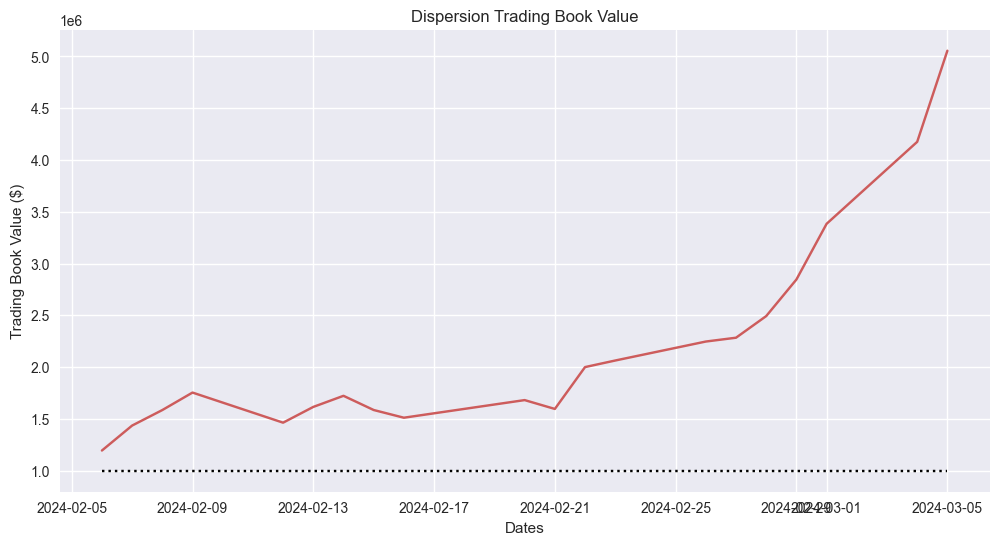

In [77]:
"""
Display Line Graph for the Trading Book Value
"""

# Display the Trading Book Value History
plt.plot(trading_book_value_df, c='indianred')

# Display horizontal line for the initial level of the trading book
plt.hlines(initial_AUM, trading_book_value_df.index[0], trading_book_value_df.index[-1], colors='black', linestyle=':')

# Set the graph title
plt.title('Dispersion Trading Book Value')

# Set the X and Y axis labels
plt.xlabel('Dates')
plt.ylabel('Trading Book Value ($)');

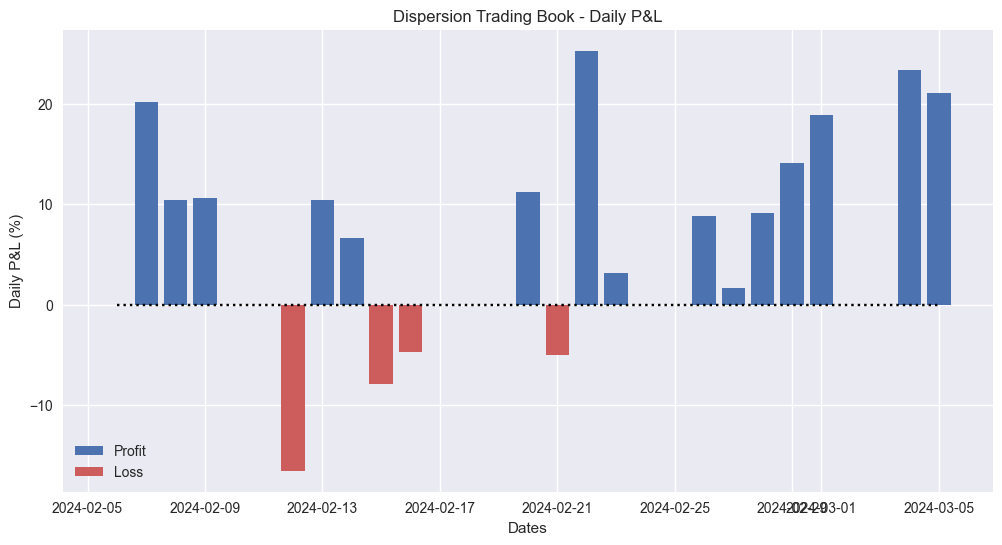

In [78]:
"""
Display the Daily P&L generated during the Back-Test
"""

# Compute the daily P&L in percentage
trading_book_pnl_df = trading_book_value_df.pct_change().dropna()

# Get the P&L values for every dates
pnl_values = trading_book_pnl_df.iloc[:, 0].to_numpy(dtype=float)

# Get the dates corresponding to the P&L values
pnl_dates = trading_book_pnl_df.index

# Only keep the profit
profit = np.where(pnl_values >= 0, pnl_values, np.nan)

# Only keep the loss
loss = np.where(pnl_values < 0, pnl_values, np.nan)

# Display the days of profit
plt.bar(pnl_dates, profit * 100, label='Profit')

# Display the days of loss
plt.bar(pnl_dates, loss * 100, label='Loss', color='indianred')

# Display an horizontal line at 0 to split profitt and loss
plt.hlines(0, pnl_dates[0], pnl_dates[-1], colors='black', linestyle=':')

# Set the title of the graph
plt.title('Dispersion Trading Book - Daily P&L')

# Set the X and Y axis label
plt.xlabel('Dates')
plt.ylabel('Daily P&L (%)')

# Set the legend of the graph
plt.legend();

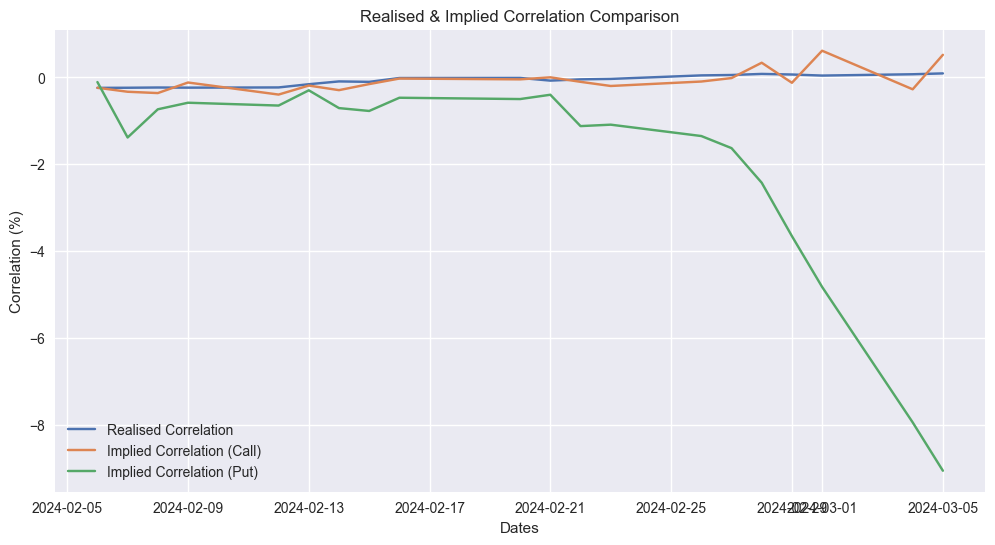

In [79]:
"""
Display the Realised Correlation & Implied Correlation during the Back-Test
"""
# Display the realised & implied correlation
plt.plot(correlation_df.loc[strategy_start_date:] * 100);

# Set the graph title
plt.title('Realised & Implied Correlation Comparison')

# Set the X and Y axis label
plt.xlabel('Dates')
plt.ylabel('Correlation (%)')

# Set the legend of the graph
plt.legend(correlation_df.columns);

### 4. Performance & Risk Measures
**Performance** and **risk measures** are metrics used by investors and analysts to evaluate the performance and risk characteristics of investment portfolios, individual securities, or trading strategies. These measures help assess how well an investment has performed over a given period and quantify the level of risk associated with that investment.

#### 4.1. Drawdown
**Drawdown** measures the peak-to-trough decline in the value of an investment or portfolio during a specific period. It quantifies the extent of loss experienced by investors during adverse market conditions.

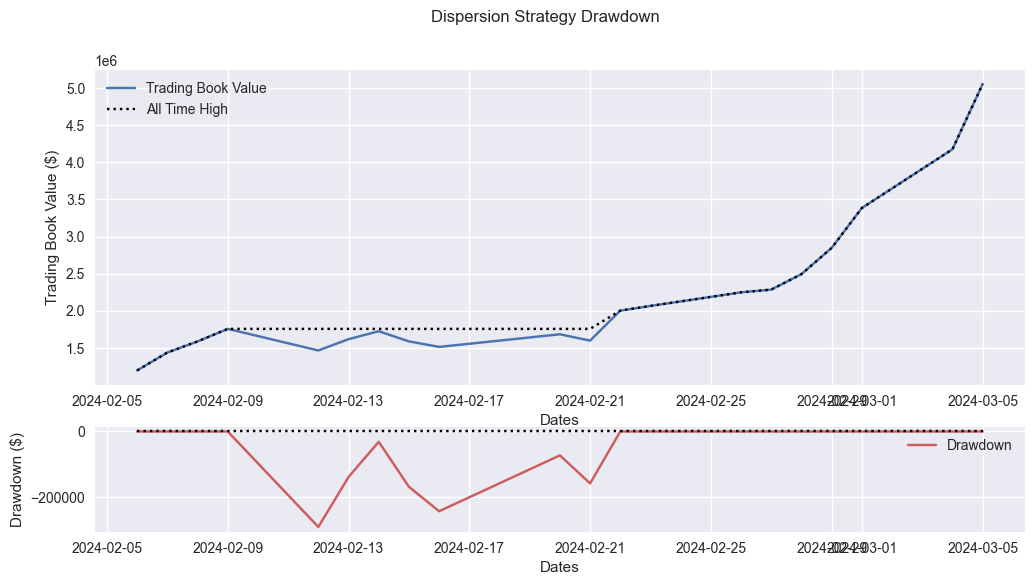

In [80]:
# compute the cumulative maximum value
max_value_df = trading_book_value_df.cummax()

# Calculate the drawdown of the serie
drawdown_df = trading_book_value_df - max_value_df

"""
Display the Drawdown
"""
# Set the graph composition, number of raw and columns and size/ratio
fig, ax = plt.subplots(2, 1, gridspec_kw={'height_ratios':[3,1]})

# Set the graph title
fig.suptitle(f'Dispersion Strategy Drawdown')

# Display the Trading Book Value History and its maximum values
ax[0].plot(trading_book_value_df)
ax[0].plot(max_value_df, color='black', linestyle=':')
ax[0].set_xlabel('Dates')
ax[0].set_ylabel('Trading Book Value ($)')

# Set the legend of the graph
ax[0].legend(['Trading Book Value', 'All Time High']);


# Display the drawdown history
ax[1].plot(drawdown_df, color='indianred')

# Display an horizontal line for the 0.0
ax[1].hlines(0, trading_book_value_df.index[0], trading_book_value_df.index[-1], color='black', linestyles=':')

# Set the x and y axis labels
ax[1].set_xlabel('Dates')
ax[1].set_ylabel('Drawdown ($)')

# Set the legend of the graph
ax[1].legend(['Drawdown']);

In [81]:
# Calculate the Maximum Drawwdown
max_drawdown_pct = drawdown_df.min()[0] / initial_AUM

# Display the Maximum Drawdown result 
print(f'The Maximum Drawdown of our strategy is: {(max_drawdown_pct*100).round(2)}%')

The Maximum Drawdown of our strategy is: -29.07%


Our simulation give us a Maximum Drawdown of **-29.07%**

---

#### 4.2. Sharpe Ratio
Sharpe Ratio is a ratio of excess return (return above the risk-free rate) to the standard deviation of returns, indicating the amount of excess return per unit of risk.

$$
    \text{Sharpe Ratio} = \frac{Return - r_{rf}}{\sigma}
$$

In [82]:
# Calculate the average annual return
annual_return = trading_book_pnl_df.mean()[0] * nb_business_day

# Calculate the annual volatility
annual_vol = trading_book_pnl_df.std()[0] * np.sqrt(nb_business_day)

# Calculate the Sharpe Ratio
sharpe_ratio = (annual_return - rf_rate) / annual_vol

# Display the Sharpe Ratio value 
print(f'The Sharpe Ratio of the strategy is: {sharpe_ratio.round(2)}')

The Sharpe Ratio of the strategy is: 11.62


> We must exercise caution with these results as our strategy was only backtested over approximately 40 days. Such a limited dataset is insufficient for achieving significant ratios; thousands of data points are typically required for robust analysis.

In our case, we obtained: **11.62**

---

#### 4.3 Other Metrics
Here's a brief explanation of other performance metrics we could use:
- **Sortino Ratio:** Similar to the Sharpe ratio but only considers downside risk (volatility of negative returns), providing a more focused measure of risk-adjusted return.

- **Treynor Ratio:** Named after economist Jack Treynor, measures the risk-adjusted return of a portfolio relative to its systematic risk or beta. It is calculated as the excess return of the portfolio over the risk-free rate divided by the portfolio's beta.

- **The Calmar ratio** Named after commodities trader Terry W. Young's company, Calmar Investments, measures the risk-adjusted return of an investment relative to its maximum drawdown. It is calculated as the annualized return of the investment divided by its maximum drawdown.

- **Information Ratio:** The ratio of excess return relative to a benchmark to the tracking error (standard deviation of excess returns), indicating the consistency of outperformance relative to the benchmark.

- **Jensen's Alpha:** Measures the risk-adjusted return of an investment relative to its expected return based on its beta (systematic risk). It is calculated as the excess return of the investment over its expected return based on the Capital Asset Pricing Model (CAPM).

- **Value-at-Risk (VaR):** VaR quantifies the maximum potential loss of an investment or portfolio over a specified time horizon at a given confidence level. It provides a single numerical estimate of downside risk, helping investors manage risk exposure.

- **Conditional Value-at-Risk (CVaR):** Also known as **Expected Shortfall**, CVaR measures the expected loss beyond the VaR threshold. It provides additional information about the severity of potential losses in the tail of the distribution.

---

## V. Conclusion

### 1. Limits

When we constructed our trading strategies, the following simplifying assumptions was applied:
1. No transaction costs are considered.
2. There is no bid/ask spread involved.
3. Real market data, such as option prices and implied volatility, are not taken into account.
4. The model assumes a fixed risk-free rate.
5. No dividends are factored into the calculations.
6. Liquidity issues are not considered in the model.
7. There are no constraints on short selling.
8. Hedging is performed using the spot rate instead of the forward rate.

### 2. Key Points
This project focused on introducing stochastic volatility models, particularly the Heston model. We explored the calibration of the model to market data, although it didn't entirely eliminate static arbitrage in the volatility surface, as evidenced in our previous project on the SVI model in the Numerical Methods course. Additionally, we delved into implied volatility and its computation using the Newton-Raphson algorithm.

Furthermore, we analyzed the volatility and correlation of an ETF to identify market distortions in option pricing, leading to the development of a quantitative trading strategy to exploit ETF dispersion.

While our simulated strategy demonstrated promising performance, we encountered several limitations inherent in our model. Notably, transaction costs emerged as a significant challenge in implementing a trading strategy.

Overall, this project provided valuable insights into the Heston model and dispersion trading, contributing to our understanding of quantitative finance concepts.

### 3. References
[1] **Colin Bennett - Trading Volatility, Correlation, Term Structure & Skew** (2014)  
[2] **Marco Avellaneda - Lecture 10: Dispersion Trading** (2009)  
[3] **Qian Deng - Volatility Dispersion Trading** (2008)  